# Music & Mental Health Data Analysis

In this data analysis project, we're going to examine music and mental health survey results to identify the correlations between music related habits of respondents and mental health, if there any.

#### Dataset Context & Features
Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

- **Timestamp**: Date and time when form was submitted.
- **Age**: Respondent's age.
- **Primary streaming service**: Primary streaming service.
- **Hours per day**: Number of hours the respondent listens to music per day.
- **While working**: Does the respondent listen to music while studying/working?
- **Instrumentalist**: Does the respondent play an instrument regularly?
- **Composer**: Does the respondent compose music?
- **Fav genre**: Respondent's favorite or top genre.
- **Exploratory**: Does the respondent actively explore new artists/genres?
- **Foreign languages**: Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- **BPM**: Beats per minute of favorite genre.
- **Frequency [Classical]**: How frequently the respondent listens to classical music.
- **Frequency [Country]**: How frequently the respondent listens to country music.
- **Frequency [EDM]**: How frequently the respondent listens to EDM music.
- **Frequency [Folk]**: How frequently the respondent listens to folks music.
- **Frequency [Gospel]**: How frequently the respondent listens to Gospel music.
- **Frequency [Hip hop]**: How frequently the respondent listens to hip hop music.
- **Frequency [Jazz]**: How frequently the respondent listens to jazz music.
- **Frequency [K pop]**: How frequently the respondent listens to K pop music.
- **Frequency [Latin]**: How frequently the respondent listens to Latin music.
- **Frequency [Lofi]**: How frequently the respondent listens to lofi music.
- **Frequency [Metal]**: How frequently the respondent listens to metal music.
- **Frequency [Pop]**: How frequently the respondent listens to pop music.
- **Frequency [R&B]**: How frequently the respondent listens to R&B music.
- **Frequency [Rap]**: How frequently the respondent listens to rap music.
- **Frequency [Rock]**: How frequently the respondent listens to rock music.
- **Frequency [Video game music]**: How frequently the respondent listens to video game music.
- **Anxiety**: Self-reported anxiety, on a scale of 0-10.
- **Depression**: Self-reported depression, on a scale of 0-10.
- **Insomnia**: Self-reported insomnia, on a scale of 0-10.
- **OCD**: Self-reported OCD, on a scale of 0-10.
- **Music effects**: Does music improve/worsen respondent's mental health conditions?
- **Permissions**: Permissions to publicize data.

**Dataset Link**: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

- **Kaggle**: https://www.kaggle.com/mybozkir
- **GitHub**: https://github.com/mybozkir
- **Social Accounts**: https://bento.me/mybozkir

## 0. Loading libraries and the dataset

In [428]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

sns.set_palette("deep")

In [429]:
# Get the dataset
mxmh = pd.read_csv("mxmh_survey_results.csv")
df = mxmh.copy()

In [430]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.00,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.00,0.00,1.00,0.00,NaN,I understand.
1,8/27/2022 19:57:31,63.00,Pandora,1.50,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.00,2.00,2.00,1.00,NaN,I understand.
2,8/27/2022 21:28:18,18.00,Spotify,4.00,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.00,7.00,10.00,2.00,No effect,I understand.
3,8/27/2022 21:40:40,61.00,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.00,7.00,3.00,3.00,Improve,I understand.
4,8/27/2022 21:54:47,18.00,Spotify,4.00,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.00,2.00,5.00,9.00,Improve,I understand.


It seems that we've got the data clearly. We can move on.

## 1. First look to dataset

There 736 records in the dataset with 33 columns.

In [434]:
df.shape

(736, 33)

There are several missing values in the dataset. It looks like that we can handle them clearly.

In [436]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

Data types of columns seems true, we'll examine deeply.

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [439]:
# Let's create empty lists to hold categorical and numerical column names
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == "object":
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [440]:
# Print the count of categorical columns.
print(f"There are {len(categorical_columns)} categorical columns in dataframe.")

# Print the count of numerical columns.
print(f"There are {len(numerical_columns)} categorical columns in dataframe.")

There are 26 categorical columns in dataframe.
There are 7 categorical columns in dataframe.


In [441]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.00,25.21,12.05,10.00,18.00,21.00,28.00,89.00
Hours per day,736.00,3.57,3.03,0.00,2.00,3.00,5.00,24.00
BPM,629.00,1589948.34,39872606.18,0.00,100.00,120.00,144.00,999999999.00
Anxiety,736.00,5.84,2.79,0.00,4.00,6.00,8.00,10.00
Depression,736.00,4.80,3.03,0.00,2.00,5.00,7.00,10.00
Insomnia,736.00,3.74,3.09,0.00,1.00,3.00,6.00,10.00
OCD,736.00,2.64,2.84,0.00,0.00,2.00,5.00,10.00


We can say that there are some anomalies in the dataset.

- In **Hours per day** column, maximum hours per day is 24 hours. It is certain that no one can listen music for all day.
- In **BPM** column, maximum value is 999999999.00. Obviously it can not be.
- I've not given my decision about max value of **Age** column since 89 is an age which can be exist, but in our case, it'll be better to examine and give a decision.

## 2. Timestamp Column

Since we know that the survey is completed in 2022, we'll only take the months and see the distribution of answers.

In [444]:
df['Timestamp'][0][:10]

'8/27/2022 '

In [445]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [446]:
df['Month'] = df['Timestamp'].dt.month

In [447]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Month
0,2022-08-27 19:29:02,18.00,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Never,Sometimes,3.00,0.00,1.00,0.00,NaN,I understand.,8
1,2022-08-27 19:57:31,63.00,Pandora,1.50,Yes,No,No,Rock,Yes,No,...,Rarely,Very frequently,Rarely,7.00,2.00,2.00,1.00,NaN,I understand.,8
2,2022-08-27 21:28:18,18.00,Spotify,4.00,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.00,7.00,10.00,2.00,No effect,I understand.,8
3,2022-08-27 21:40:40,61.00,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.00,7.00,3.00,3.00,Improve,I understand.,8
4,2022-08-27 21:54:47,18.00,Spotify,4.00,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.00,2.00,5.00,9.00,Improve,I understand.,8


We can see that the survey started in August and resumed and finished in November.

In [449]:
df.Month.value_counts()

Month
8     446
9     252
10     34
11      4
Name: count, dtype: int64

In [450]:
months = list(df.Month.value_counts().index.values)
answer_counts = list(df.Month.value_counts().values)

months, answer_counts

([8, 9, 10, 11], [446, 252, 34, 4])

In [451]:
answers_per_month = pd.DataFrame({
                                    'month' : months,
                                    'count_of_answers' : answer_counts
                                  }).sort_values(by = 'count_of_answers', ascending = False);

answers_per_month['month'] = answers_per_month['month'].astype(dtype = "category")
answers_per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   month             4 non-null      category
 1   count_of_answers  4 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 324.0 bytes


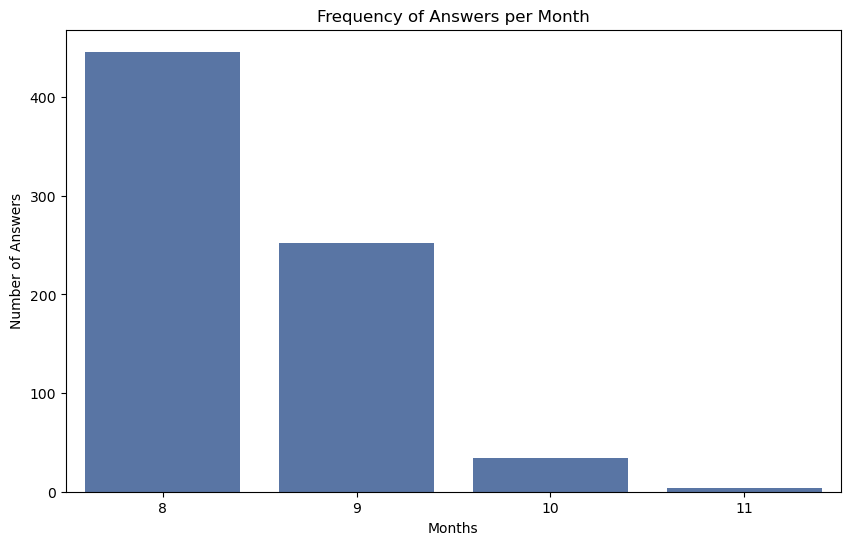

In [452]:
plt.figure(figsize = (10, 6))

sns.barplot(data = answers_per_month, x = "month", y = "count_of_answers")

plt.title("Frequency of Answers per Month")
plt.xlabel("Months")
plt.ylabel("Number of Answers")

plt.show()

We can clearly see that, number of answers are decreasing as months goes by.

## 3. Dropping Unnecessary Columns

In the dataset, some columns seems to unnecessary to examine since they contain worthless information.

1. We do not need to keep `Timestamp` column anymore since we've extracted the month information already.
2. We do not need to keep `Permissions` column since all values are same (it is very understandable).


In [455]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Month
0,2022-08-27 19:29:02,18.00,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Never,Sometimes,3.00,0.00,1.00,0.00,NaN,I understand.,8
1,2022-08-27 19:57:31,63.00,Pandora,1.50,Yes,No,No,Rock,Yes,No,...,Rarely,Very frequently,Rarely,7.00,2.00,2.00,1.00,NaN,I understand.,8
2,2022-08-27 21:28:18,18.00,Spotify,4.00,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.00,7.00,10.00,2.00,No effect,I understand.,8
3,2022-08-27 21:40:40,61.00,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.00,7.00,3.00,3.00,Improve,I understand.,8
4,2022-08-27 21:54:47,18.00,Spotify,4.00,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.00,2.00,5.00,9.00,Improve,I understand.,8


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           735 non-null    float64       
 2   Primary streaming service     735 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 733 non-null    object        
 5   Instrumentalist               732 non-null    object        
 6   Composer                      735 non-null    object        
 7   Fav genre                     736 non-null    object        
 8   Exploratory                   736 non-null    object        
 9   Foreign languages             732 non-null    object        
 10  BPM                           629 non-null    float64       
 11  Frequency [Classical]         73

In [457]:
df.Permissions.value_counts()

Permissions
I understand.    736
Name: count, dtype: int64

In [458]:
# Drop Timestamp and Permissions columns
df.drop(columns = ['Timestamp', 'Permissions'], axis = 1, inplace = True)
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month
0,18.00,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,156.00,...,Sometimes,Very frequently,Never,Sometimes,3.00,0.00,1.00,0.00,NaN,8
1,63.00,Pandora,1.50,Yes,No,No,Rock,Yes,No,119.00,...,Sometimes,Rarely,Very frequently,Rarely,7.00,2.00,2.00,1.00,NaN,8
2,18.00,Spotify,4.00,No,No,No,Video game music,No,Yes,132.00,...,Never,Rarely,Rarely,Very frequently,7.00,7.00,10.00,2.00,No effect,8
3,61.00,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,84.00,...,Sometimes,Never,Never,Never,9.00,7.00,3.00,3.00,Improve,8
4,18.00,Spotify,4.00,Yes,No,No,R&B,Yes,No,107.00,...,Very frequently,Very frequently,Never,Rarely,7.00,2.00,5.00,9.00,Improve,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.00,Spotify,2.00,Yes,Yes,No,Rock,Yes,Yes,120.00,...,Never,Rarely,Very frequently,Never,7.00,6.00,0.00,9.00,Improve,10
732,18.00,Spotify,1.00,Yes,Yes,No,Pop,Yes,Yes,160.00,...,Never,Never,Sometimes,Sometimes,3.00,2.00,2.00,5.00,Improve,11
733,19.00,Other streaming service,6.00,Yes,No,Yes,Rap,Yes,No,120.00,...,Sometimes,Sometimes,Rarely,Rarely,2.00,2.00,2.00,2.00,Improve,11
734,19.00,Spotify,5.00,Yes,Yes,No,Classical,No,No,170.00,...,Never,Never,Never,Sometimes,2.00,3.00,2.00,1.00,Improve,11


## 4. Age Column

In [460]:
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
735 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


We have 736 entries but there are 735 non-null rows, so there is one missing value in the column. Let's validate it and observe the row.

In [462]:
df.Age.isnull().sum()

1

In [463]:
df[df['Age'].isna()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month
12,NaN,Spotify,3.00,Yes,No,No,Hip hop,Yes,Yes,NaN,...,Sometimes,Rarely,Rarely,Never,9.00,3.00,2.00,7.00,Improve,8


Our only missing value belongs to a respondent who likes to listening Hip hop genre mostly. We can take mean age to fill the value but if we can obtain the mean value of the respondents who likes to listening Hip hop genre, our prediction will be more accurate.

In [465]:
df[df['Fav genre'] == "Hip hop"]['Age'].mean()

23.441176470588236

The mean value is 23.44. Since age value cannot be float, let's round it.

In [467]:
mean_hiphop_age = round(df[df['Fav genre'] == "Hip hop"]['Age'].mean())

mean_hiphop_age

23

Now we can fill the NA value.

In [469]:
df.Age.fillna(value = mean_hiphop_age, inplace = True)

df.Age.isna().sum()

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\2595306843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(value = mean_hiphop_age, inplace = True)


0

In [470]:
df.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
736 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


Let's change the dtype of Age column from float64 to int64.

In [472]:
df.Age = df.Age.astype('int64')

Now ve can observe the most frequent ages.

In [474]:
print(f"Minimum age among participants in the survey is: {df.Age.min()}")
print(f"Maximum age among participants in the survey is: {df.Age.max()}")

Minimum age among participants in the survey is: 10
Maximum age among participants in the survey is: 89


In [475]:
most_10_ages = df.Age.value_counts().iloc[:10]
most_10_ages

Age
18    85
19    61
17    59
21    52
16    44
20    40
22    39
23    38
26    22
25    22
Name: count, dtype: int64

In [476]:
most_10_ages_values = list(most_10_ages.index.values)
most_10_ages_freq = list(most_10_ages.values)

most_10_ages_df = pd.DataFrame({
    'values' : most_10_ages_values,
    'freq' : most_10_ages_freq
}).sort_values(by = 'freq', ascending = False)

most_10_ages_df

,values,freq
0,18,85
1,19,61
2,17,59
3,21,52
4,16,44
5,20,40
6,22,39
7,23,38
8,26,22
9,25,22


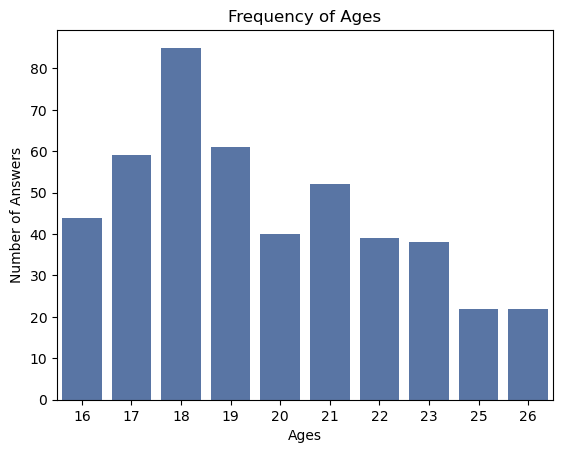

In [477]:
sns.barplot(data = most_10_ages_df, x = 'values', y = 'freq')

plt.title("Frequency of Ages")
plt.xlabel("Ages")
plt.ylabel("Number of Answers")

plt.show()

Most occured age in the dataset is 18 and we can also see that first 10 ages are between 16 and 26. We can easily say that, most of the respondents are young people.

We can also create age categories such as teenager, young, mature and old.

For x is age of the participant:

- 0 < x < 18 can be teenager,
- 18 < x < 25 can be young,
- 25 < x < 40 can be mature,
- 40 < x can be old.

In [480]:
df['Age_Category'] = pd.cut(x = df['Age'],
                            bins = [0, 18, 25, 40, np.max(df['Age'])],
                            labels = ['Teenager', 'Young', 'Mature', 'Old'],
                            right = False)

df['Age_Category']

0         Young
1           Old
2         Young
3           Old
4         Young
         ...   
731    Teenager
732       Young
733       Young
734       Young
735      Mature
Name: Age_Category, Length: 736, dtype: category
Categories (4, object): ['Teenager' < 'Young' < 'Mature' < 'Old']

In [481]:
age_categories = df.Age_Category.value_counts().index.values
age_category_freq = df.Age_Category.value_counts().values

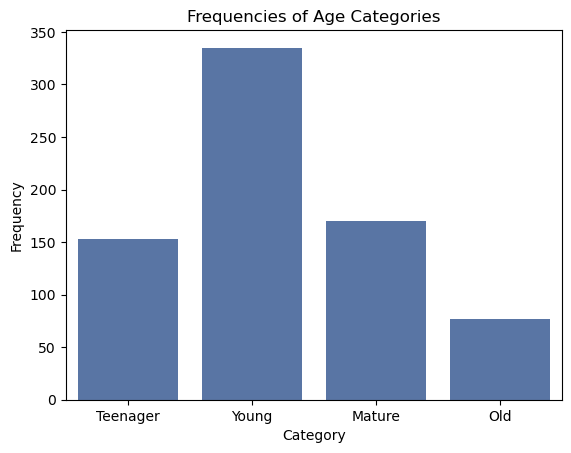

In [482]:
sns.barplot(x = age_categories, y = age_category_freq)

plt.title('Frequencies of Age Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Now we've validated that most of the respondents are young people who are between ages 18 and 25.

## 5. Primary Streaming Services

This column contains the information of which primary streaming service are participants using mostly.

In [485]:
df['Primary streaming service'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Primary streaming service
Non-Null Count  Dtype 
--------------  ----- 
735 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


We have another NA value in this column.

In [487]:
df[df['Primary streaming service'].isna()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category
197,21,NaN,5.00,Yes,No,No,Country,Yes,No,85.00,...,Rarely,Very frequently,Never,9.00,8.00,9.00,7.00,Improve,8,Young


The single value contains NaN belongs to a respondent who belongs to **Young** category. We can derive the most frequent streaming service among Young people for assignment.

In [489]:
young_pss = df[df['Age_Category'] == 'Young']['Primary streaming service'].mode()[0]

young_pss

'Spotify'

Most frequent streaming service among Young people is Spotify. Let's fill the value.

In [491]:
df['Primary streaming service'].fillna(value = young_pss, inplace = True)

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\4158957515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Primary streaming service'].fillna(value = young_pss, inplace = True)


In [492]:
df['Primary streaming service'].isna().sum()

0

Now we can look at how many different streaming services.

In [494]:
df['Primary streaming service'].value_counts()

Primary streaming service
Spotify                              459
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

Firstful, I want to do two things:

1. Replacing "I do not use a streaming service." answer with "Not",
2. Replacing "Other streaming service" answer with "Other".

In [496]:
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.' : 'Not',
    'Other streaming service' : 'Other'
})

df['Primary streaming service'].value_counts()

Primary streaming service
Spotify          459
YouTube Music     94
Not               71
Apple Music       51
Other             50
Pandora           11
Name: count, dtype: int64

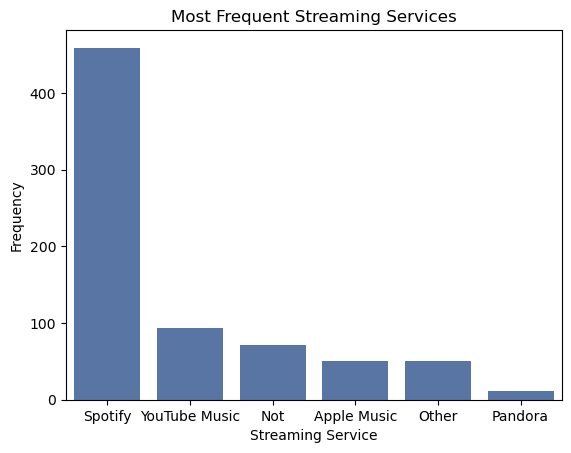

In [497]:
streaming_services = df['Primary streaming service'].value_counts().index.values
streaming_services_freq = df['Primary streaming service'].value_counts().values

sns.barplot(x = streaming_services, y = streaming_services_freq)

plt.title("Most Frequent Streaming Services")
plt.xlabel("Streaming Service")
plt.ylabel("Frequency")
plt.show()

Most frequent streaming service among all respondents is Spotify and Youtube Music following it as expected.

I think the surprise is that the number of respondents who are not using any streaming service more than number of participants who are using Apple Music. Maybe the results would be different if more respondents answered the survey but since Apple Music seems that it is one of the most quality streaming services, I would expect that amount of users will be higher than it is.

We'll analyse different aspects about the features as we continue.;

## 6. Hours per day

This columns gives us the information about number of hours that respondents listens music per day.


In [500]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category
0,18,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,156.00,...,Very frequently,Never,Sometimes,3.00,0.00,1.00,0.00,NaN,8,Young
1,63,Pandora,1.50,Yes,No,No,Rock,Yes,No,119.00,...,Rarely,Very frequently,Rarely,7.00,2.00,2.00,1.00,NaN,8,Old
2,18,Spotify,4.00,No,No,No,Video game music,No,Yes,132.00,...,Rarely,Rarely,Very frequently,7.00,7.00,10.00,2.00,No effect,8,Young
3,61,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,84.00,...,Never,Never,Never,9.00,7.00,3.00,3.00,Improve,8,Old
4,18,Spotify,4.00,Yes,No,No,R&B,Yes,No,107.00,...,Very frequently,Never,Rarely,7.00,2.00,5.00,9.00,Improve,8,Young


In [501]:
df['Hours per day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Hours per day
Non-Null Count  Dtype  
--------------  -----  
736 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


 There is no NaN value in the column.

In [503]:
df[['Hours per day']].describe().T

,count,mean,std,min,25%,50%,75%,max
Hours per day,736.00,3.57,3.03,0.00,2.00,3.00,5.00,24.00


In [504]:
df['Hours per day'].sort_values(ascending = False)[:10]

366   24.00
695   24.00
18    24.00
290   20.00
726   18.00
347   16.00
359   15.00
485   15.00
407   14.00
426   13.00
Name: Hours per day, dtype: float64

In [505]:
df['Hours per day'].sort_values(ascending = True)[:10]

386   0.00
57    0.00
639   0.00
654   0.00
607   0.00
455   0.00
609   0.10
643   0.25
42    0.25
490   0.25
Name: Hours per day, dtype: float64

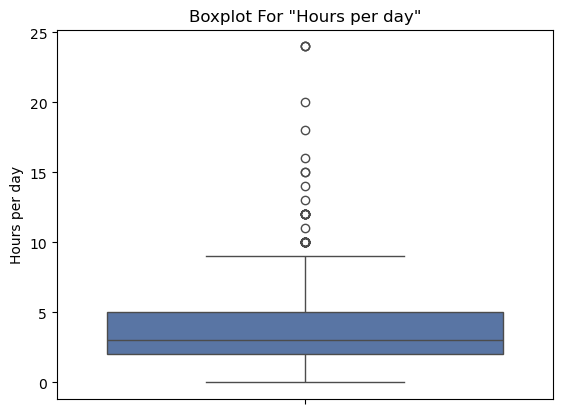

In [506]:
sns.boxplot(df['Hours per day'])

plt.title('Boxplot For "Hours per day"')
plt.ylabel("Hours per day")

plt.show()

In [507]:
df['Hours per day'].value_counts()[:5]

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\1126919793.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df['Hours per day'].value_counts()[:5]


Hours per day
2.00    173
3.00    120
1.00    117
4.00     83
5.00     54
Name: count, dtype: int64

As we can see, most of the values are between 1 and 5 hours.

We have also anomalies, which are more than 10 hours.

Let's think that, is it really possible to listen music for 24 hours? I do not think so. But maybe some respondents gave the answer because they want to show that they're really addicted to listening music, it is possible.

We can suppress, change or delete the outliers, but how about creating categories to represent hours of listening music so we can categorize it?

At this point, I want to remind an important thing; we are not preparing any machine learning model for now. Our only goal is analyzing the data as much as possible. I want to highlight this truth because categorizing numerical features like we are doing right now can create problems for machine learning models. We do not care for this point right now.

Let's create the categories.

For value in `Hours per day`, I will create categories as below:

- [0 < x < 5) -> "Less"
- [5 < x < 10) -> "Normal"
- [10 < x) -> "More"

In [509]:
df['Hours_Category'] = pd.cut(x = df['Hours per day'],
                              bins = [0, 5, 10, np.max(df['Hours per day'])],
                              right = False,
                              labels = ['Less', 'Normal', 'More'])

Now we can drop the `Hours per day` column since we will not use it again.

In [511]:
df.drop(columns = ['Hours per day'], inplace = True)

"Hourse per day" in df.columns

False

## 7. While Working

Does participants listen music while they're working or not?

In [513]:
df['While working'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: While working
Non-Null Count  Dtype 
--------------  ----- 
733 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


We have 3 NaN values in the column.

In [515]:
df['While working'].isna().sum()

3

In [516]:
df[df['While working'].isna()]

,Age,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category,Hours_Category
57,42,Not,NaN,No,No,Rock,No,Yes,NaN,Rarely,...,Sometimes,Sometimes,9.00,0.00,10.00,0.00,No effect,8,Old,Less
426,30,Spotify,NaN,No,No,K pop,Yes,Yes,145.00,Sometimes,...,Very frequently,Sometimes,10.00,10.00,10.00,7.00,Improve,8,Mature,More
561,21,Spotify,NaN,NaN,NaN,K pop,Yes,NaN,NaN,Rarely,...,Very frequently,Rarely,4.00,5.00,2.00,5.00,NaN,9,Young,Less


In [517]:
df['While working'].value_counts()

While working
Yes    579
No     154
Name: count, dtype: int64

We can assume that, if any value in this column is NaN, that means that these respondents do not listen music while working.

We can fill them with the value "No".

In [519]:
df['While working'].fillna(value = "No", inplace = True)

df['While working'].isna().sum()

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\1638965677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['While working'].fillna(value = "No", inplace = True)


0

In [520]:
df['While working'].value_counts()

While working
Yes    579
No     157
Name: count, dtype: int64

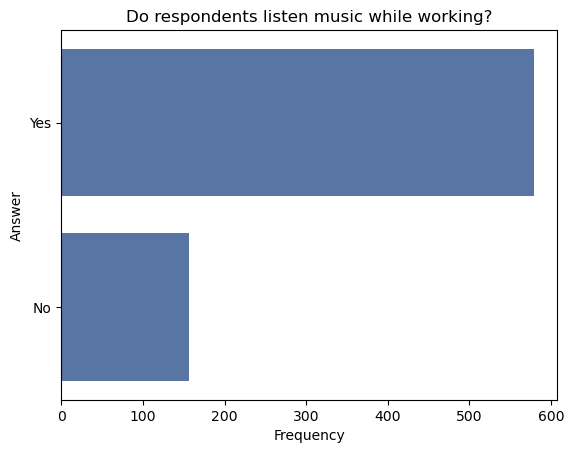

In [521]:
sns.countplot(df['While working'])

plt.title("Do respondents listen music while working?")
plt.xlabel("Frequency")
plt.ylabel("Answer")
plt.show()

Most of the respondents listen music while they're working.

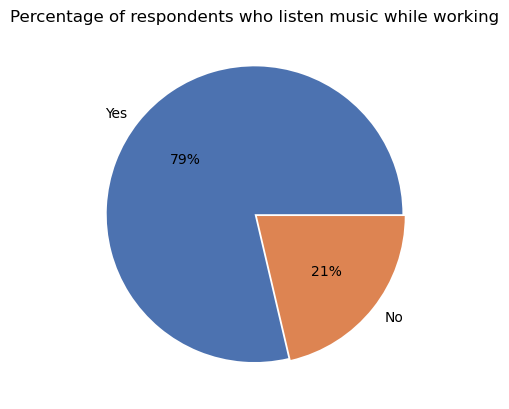

In [523]:
list(df['While working'].value_counts().values)
list(df['While working'].value_counts().index.values)

plt.pie(x = list(df['While working'].value_counts().values),
        labels = list(df['While working'].value_counts().index.values),
        autopct = "%1.f%%",
        explode = [0, 0.02])

plt.title("Percentage of respondents who listen music while working")
plt.show()

While 79% of the respondents listen music while they're working, 21% does not.

## 8. Instrumentalist

In [526]:
df['Instrumentalist'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Instrumentalist
Non-Null Count  Dtype 
--------------  ----- 
732 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


We have 4 Nan values in the column.

In [528]:
df['Instrumentalist'].isna().sum()

4

In [529]:
df[df['Instrumentalist'].isna()]

,Age,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category,Hours_Category
223,18,YouTube Music,Yes,NaN,No,K pop,Yes,Yes,126.00,Never,...,Rarely,Never,3.00,7.00,5.00,2.00,Improve,8,Young,More
408,13,YouTube Music,Yes,NaN,Yes,Classical,No,No,80.00,Very frequently,...,Never,Never,8.00,7.00,9.00,2.00,Improve,8,Teenager,Less
561,21,Spotify,No,NaN,NaN,K pop,Yes,NaN,NaN,Rarely,...,Very frequently,Rarely,4.00,5.00,2.00,5.00,NaN,9,Young,Less
572,18,Spotify,Yes,NaN,No,Video game music,Yes,Yes,89.00,Sometimes,...,Never,Very frequently,7.00,0.00,3.00,1.00,No effect,9,Young,Less


In [530]:
df.Instrumentalist.value_counts()

Instrumentalist
No     497
Yes    235
Name: count, dtype: int64

Since the column contains "No" and "Yes" answers, we can assume that NaN values belong to "No" answer.

In [532]:
df.Instrumentalist.fillna(value = "No", inplace = True)

df.Instrumentalist.isna().sum()

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\2598073378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Instrumentalist.fillna(value = "No", inplace = True)


0

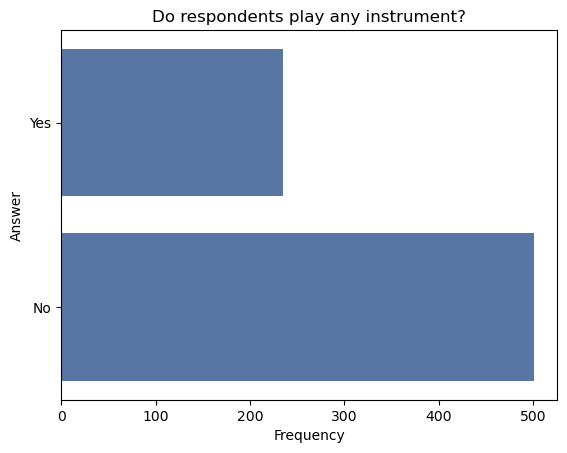

In [533]:
sns.countplot(df.Instrumentalist)

plt.title("Do respondents play any instrument?")
plt.ylabel("Answer")
plt.xlabel("Frequency")
plt.show()

While almost 1/3 of the respondents play instrument, others do not.

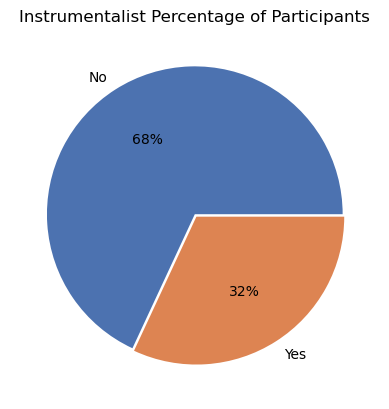

In [535]:
plt.pie(x = df['Instrumentalist'].value_counts().values,
        labels = df['Instrumentalist'].value_counts().index.values,
        explode = [0, 0.02],
        autopct = "%1.f%%")

plt.title("Instrumentalist Percentage of Participants")
plt.show()

## 9. Composer

In [537]:
df.Composer.info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Composer
Non-Null Count  Dtype 
--------------  ----- 
735 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [538]:
df[df.Composer.isna()]

,Age,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category,Hours_Category
561,21,Spotify,No,No,NaN,K pop,Yes,NaN,NaN,Rarely,...,Very frequently,Rarely,4.00,5.00,2.00,5.00,NaN,9,Young,Less


In [539]:
df.Composer.value_counts()

Composer
No     609
Yes    126
Name: count, dtype: int64

Since Composer has "Yes" and "No" values too, we can fill NaN value with "No".

In [541]:
df.Composer.fillna(value = "No", inplace = True)

df.Composer.isna().sum()

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\2298663390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Composer.fillna(value = "No", inplace = True)


0

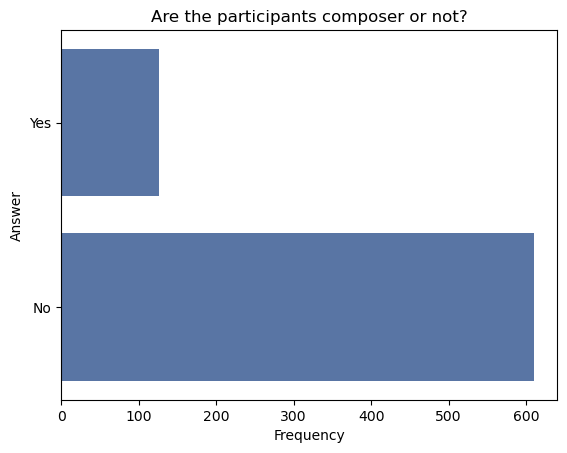

In [542]:
sns.countplot(df.Composer)

plt.title("Are the participants composer or not?")
plt.ylabel("Answer")
plt.xlabel("Frequency")
plt.show()

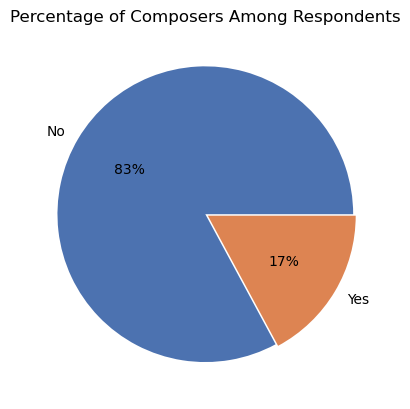

In [543]:
plt.pie(x = df.Composer.value_counts().values,
        labels = df.Composer.value_counts().index.values,
        explode = [0, 0.02],
        autopct = "%1.f%%")

plt.title("Percentage of Composers Among Respondents")
plt.show()

While 17% of the respondents are composer, remaining are not.

## 10. Fav Genre

In [546]:
df['Fav genre'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Fav genre
Non-Null Count  Dtype 
--------------  ----- 
736 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


We don't have any Nan values in the `Fav genre` column.

In [548]:
df['Fav genre'].nunique()

16

There are 16 different genres in `Fav genre` column.

In [550]:
df['Fav genre'].value_counts()

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

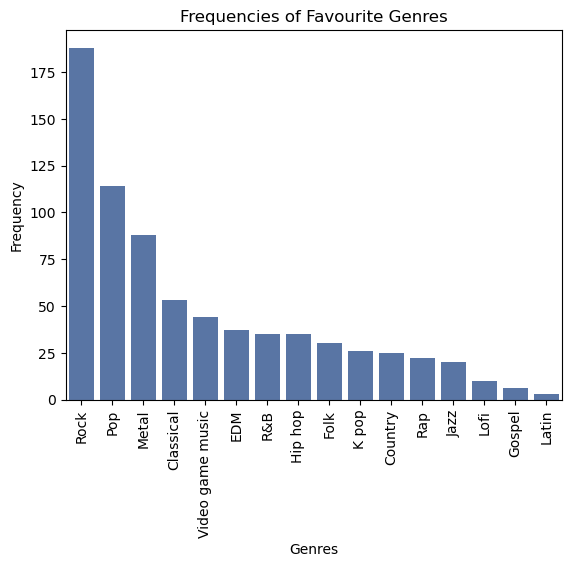

In [551]:
sns.barplot(x = fav_genre_indexes,
            y = fav_genre_values,
            )

plt.xticks(rotation = 90)
plt.title("Frequencies of Favourite Genres")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()

We can see that respondents mostly enjoy to listen Rock music with following Pop, Metal, Classical and Video game musics.

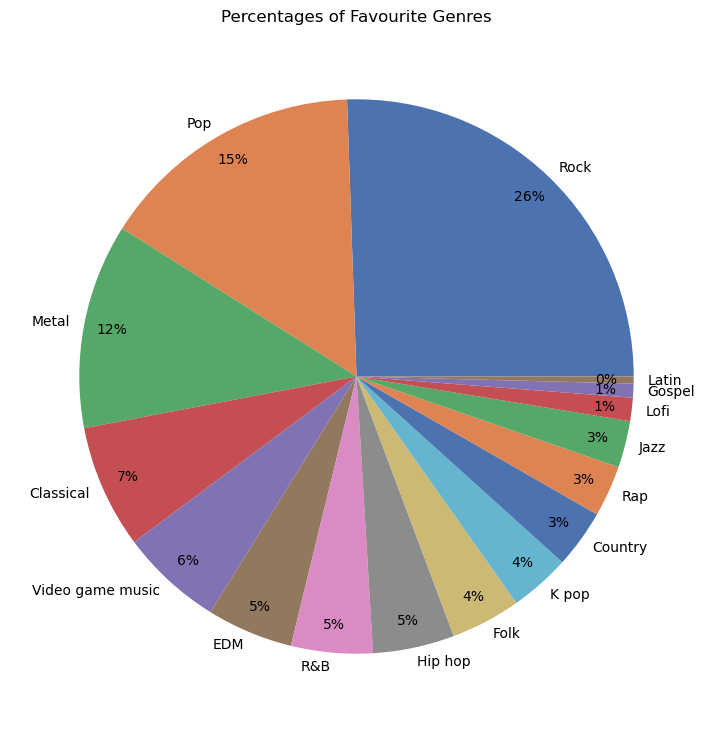

In [553]:
plt.figure(figsize = (9, 9))

plt.pie(x = fav_genre_values,
        labels = fav_genre_indexes,
        labeldistance = 1.05,
        autopct = "%1.f%%",
        pctdistance = 0.9)

plt.title("Percentages of Favourite Genres")
plt.show()

## 11. Exploratory

Does the respondent actively explore new artists/genres?

In [555]:
df.Exploratory.info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Exploratory
Non-Null Count  Dtype 
--------------  ----- 
736 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [556]:
df.Exploratory.value_counts()

Exploratory
Yes    525
No     211
Name: count, dtype: int64

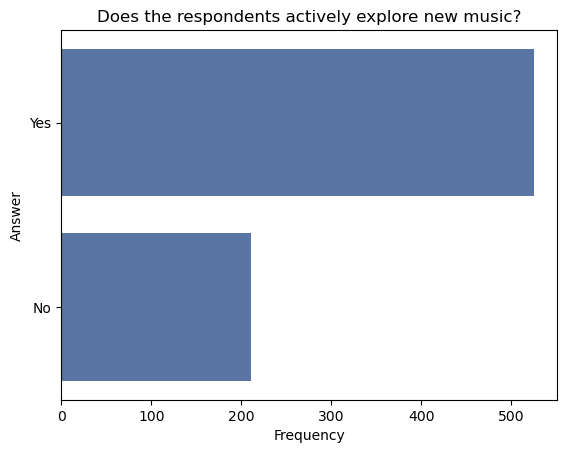

In [557]:
sns.countplot(df.Exploratory)

plt.title("Does the respondents actively explore new music?")
plt.xlabel("Frequency")
plt.ylabel("Answer")
plt.show()

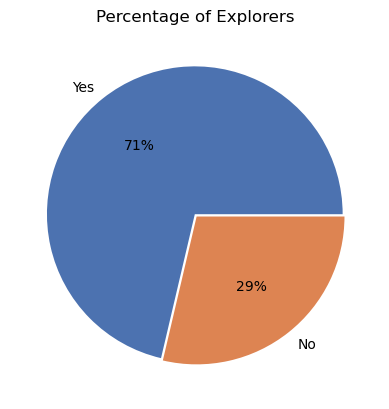

In [558]:
df.Exploratory.value_counts().index.values
df.Exploratory.value_counts().values

plt.pie(x = df.Exploratory.value_counts().values,
        labels = df.Exploratory.value_counts().index.values,
        explode = [0, 0.02],
        autopct = "%1.f%%")

plt.title("Percentage of Explorers")
plt.show()

71% of respondents actively exploring new music and/or artists.

## 12. Foreign languages

Does the respondent regularly listen to music with lyrics in a language they are not fluent in?

In [561]:
df['Foreign languages'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Foreign languages
Non-Null Count  Dtype 
--------------  ----- 
732 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [562]:
df[df['Foreign languages'].isna()]

,Age,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category,Hours_Category
235,31,Spotify,No,Yes,No,Metal,Yes,NaN,95.00,Sometimes,...,Very frequently,Sometimes,7.00,6.00,6.00,5.00,Improve,8,Mature,Less
396,14,YouTube Music,No,Yes,No,Classical,Yes,NaN,140.00,Very frequently,...,Rarely,Sometimes,1.00,2.00,4.00,3.00,Improve,8,Teenager,Less
561,21,Spotify,No,No,No,K pop,Yes,NaN,NaN,Rarely,...,Very frequently,Rarely,4.00,5.00,2.00,5.00,NaN,9,Young,Less
666,15,Spotify,Yes,Yes,No,Rock,No,NaN,132.00,Sometimes,...,Very frequently,Rarely,4.00,3.00,5.00,0.00,No effect,9,Teenager,Less


In [563]:
df['Foreign languages'].value_counts()

Foreign languages
Yes    404
No     328
Name: count, dtype: int64

We can assume that NaN values as "No".

In [565]:
df['Foreign languages'].fillna(value = "No", inplace = True)

df['Foreign languages'].isna().sum()

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\3306666713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Foreign languages'].fillna(value = "No", inplace = True)


0

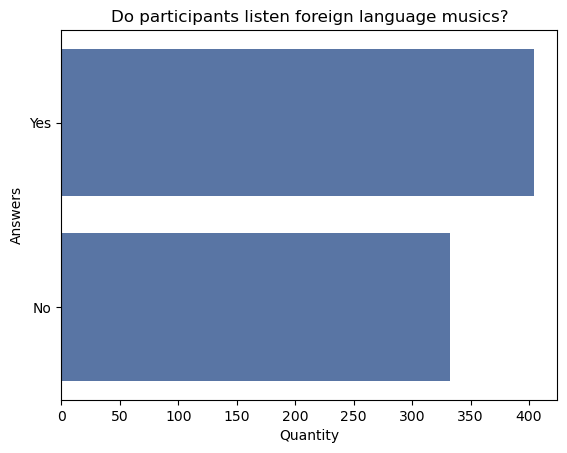

In [566]:
sns.countplot(df['Foreign languages'])

plt.title("Do participants listen foreign language musics?")
plt.xlabel("Quantity")
plt.ylabel("Answers")

plt.show()

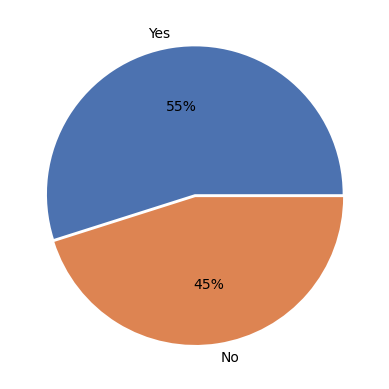

In [567]:
plt.pie(x = df['Foreign languages'].value_counts().values,
        labels = df['Foreign languages'].value_counts().index.values,
        explode = [0, 0.02],
        autopct = "%1.f%%")

plt.show()

Almost half of the respondents listen to foreign language musics while other half do not.

## 13. BPM

BPM is beats per minute of favorite genre.

In [570]:
df.BPM.nunique()

135

In [571]:
df['Fav genre'].nunique()

16

BPM is beats per minute of favorite genre as defined, and there are 135 unique BPM values in the dataset while there are only 16 different genre. We can understand that respondents answered the BPM question by hand, so all different BPM values unique and cannot be categorized and related with genres.

Let's see if there is any missing value.

In [573]:
df.BPM.isna().sum()

107

There are 107 missing values in the columns. We can try to fill them according to their genres, this will be a better choice.

In [575]:
BPM_per_genre = df.groupby('Fav genre')['BPM'].mean().to_dict()

BPM_per_genre

{'Classical': 114.575,
 'Country': 110.19047619047619,
 'EDM': 147.5,
 'Folk': 109.53846153846153,
 'Gospel': 89.25,
 'Hip hop': 111.90625,
 'Jazz': 124.47368421052632,
 'K pop': 128.56,
 'Latin': 133.66666666666666,
 'Lofi': 114.3,
 'Metal': 139.10256410256412,
 'Pop': 118.90721649484536,
 'R&B': 114.16666666666667,
 'Rap': 127.1,
 'Rock': 124.05298013245033,
 'Video game music': 27027143.513513513}

In [576]:
df.groupby('Fav genre')['BPM'].mean().round()

Fav genre
Classical               115.00
Country                 110.00
EDM                     148.00
Folk                    110.00
Gospel                   89.00
Hip hop                 112.00
Jazz                    124.00
K pop                   129.00
Latin                   134.00
Lofi                    114.00
Metal                   139.00
Pop                     119.00
R&B                     114.00
Rap                     127.00
Rock                    124.00
Video game music   27027144.00
Name: BPM, dtype: float64

Wow! It seems that there is a problem with Video game music...

In [578]:
df[['BPM']].describe().T

,count,mean,std,min,25%,50%,75%,max
BPM,629.00,1589948.34,39872606.18,0.00,100.00,120.00,144.00,999999999.00


In [579]:
df[df['Fav genre'] == "Video game music"]['BPM'].sort_values(ascending = False)[:5]

568   999999999.00
337         180.00
454         180.00
422         173.00
355         171.00
Name: BPM, dtype: float64

Let's assign the mean value but before, to find the mean value properly we need to replace the values 999999999.00 and 634.00 with NaN.

In [581]:
df['BPM'].replace({
    999999999.00 : np.nan,
    624.00 : np.nan
}, inplace = True)

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\187489513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPM'].replace({


In [582]:
df['BPM'].sort_values(ascending = False)

610   220.00
248   220.00
662   218.00
564   210.00
711   210.00
       ...  
688      NaN
700      NaN
706      NaN
712      NaN
717      NaN
Name: BPM, Length: 736, dtype: float64

We've replaced the value with NaN, now we can fill it with other NaN values.

In [584]:
mean_bpm_dict = df.groupby('Fav genre')['BPM'].mean().round().to_dict()

mean_bpm_dict

{'Classical': 115.0,
 'Country': 110.0,
 'EDM': 134.0,
 'Folk': 110.0,
 'Gospel': 89.0,
 'Hip hop': 112.0,
 'Jazz': 124.0,
 'K pop': 129.0,
 'Latin': 134.0,
 'Lofi': 114.0,
 'Metal': 139.0,
 'Pop': 119.0,
 'R&B': 114.0,
 'Rap': 127.0,
 'Rock': 124.0,
 'Video game music': 120.0}

In [585]:
for genre in df['Fav genre'].unique():
    df.loc[df['Fav genre'] == genre, 'BPM'] = df[df['Fav genre'] == genre]['BPM'].fillna(value = mean_bpm_dict[genre])

In [586]:
df['BPM'].isna().sum()

0

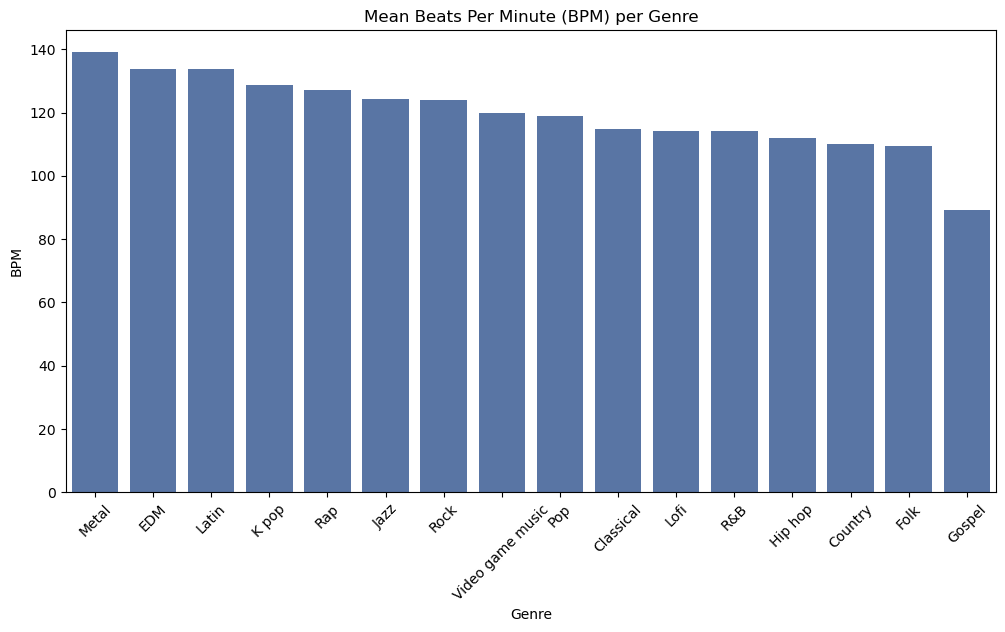

In [587]:
plt.figure(figsize = (12, 6))

sns.barplot(df.groupby('Fav genre')['BPM'].mean().sort_values(ascending = False))

plt.xticks(rotation = 45)
plt.title("Mean Beats Per Minute (BPM) per Genre")
plt.xlabel("Genre")
plt.ylabel("BPM")
plt.show()

As we can see, highest mean frequency belongs to EDM (I suppose that it is Electronic Dance Music) and it looks like accurate. It is very surprising that, for example, mean BPM for classical music is higher than R&B and Hip hop.

## 14. Music effects
Does music improve/worsen respondent's mental health conditions?

In [590]:
df['Music effects'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 736 entries, 0 to 735
Series name: Music effects
Non-Null Count  Dtype 
--------------  ----- 
728 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [591]:
df[df['Music effects'].isna()]

,Age,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category,Hours_Category
0,18,Spotify,Yes,Yes,Yes,Latin,Yes,Yes,156.00,Rarely,...,Never,Sometimes,3.00,0.00,1.00,0.00,NaN,8,Young,Less
1,63,Pandora,Yes,No,No,Rock,Yes,No,119.00,Sometimes,...,Very frequently,Rarely,7.00,2.00,2.00,1.00,NaN,8,Old,Less
161,18,Other,Yes,No,No,K pop,No,Yes,122.00,Rarely,...,Never,Never,0.00,2.00,0.00,0.00,NaN,8,Young,Less
168,19,Spotify,Yes,Yes,No,K pop,Yes,Yes,114.00,Sometimes,...,Sometimes,Sometimes,8.00,9.00,6.00,0.00,NaN,8,Young,Less
338,21,YouTube Music,Yes,No,No,EDM,No,Yes,134.00,Rarely,...,Sometimes,Very frequently,10.00,10.00,5.00,7.00,NaN,8,Young,Less
441,21,Apple Music,Yes,Yes,No,Folk,No,No,105.00,Never,...,Sometimes,Never,3.00,3.00,1.00,0.00,NaN,8,Young,Less
532,67,Not,No,No,No,Rock,No,No,124.00,Sometimes,...,Sometimes,Never,3.00,2.00,2.00,2.00,NaN,9,Old,Less
561,21,Spotify,No,No,No,K pop,Yes,No,129.00,Rarely,...,Very frequently,Rarely,4.00,5.00,2.00,5.00,NaN,9,Young,Less


In [592]:
df['Music effects'].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

There are 8 NaN values in `Music effect` column and three options to fill them;

- Improve
- No effect
- Worsen

Deriving the filling value from another feature looks like meaningless right now, we can act neutr and fill the missing values with `No effect` value.

In [594]:
df['Music effects'].fillna("No effect", inplace = True)

C:\Users\myboz\AppData\Local\Temp\ipykernel_58060\1471019281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Music effects'].fillna("No effect", inplace = True)


In [595]:
df['Music effects'].isna().sum()

0

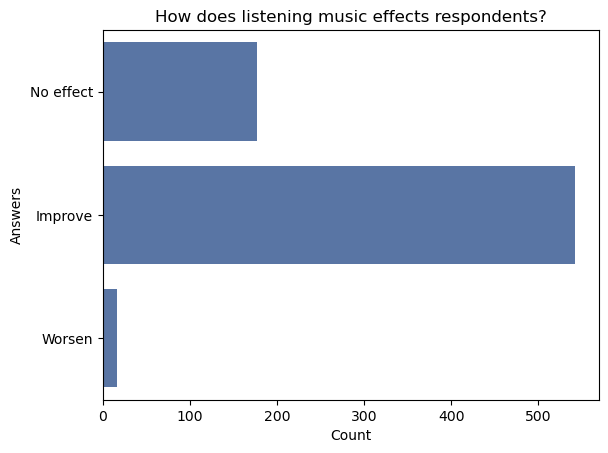

In [596]:
sns.countplot(df['Music effects'])

plt.title("How does listening music effects respondents?")
plt.xlabel("Count")
plt.ylabel("Answers")
plt.show()

While many of the respondents saying listening music improving their mental health conditions, some of them answered as listening music is worsen their health. I'm curious about what kinds of music are related with worsen health? We'll look at deeply.

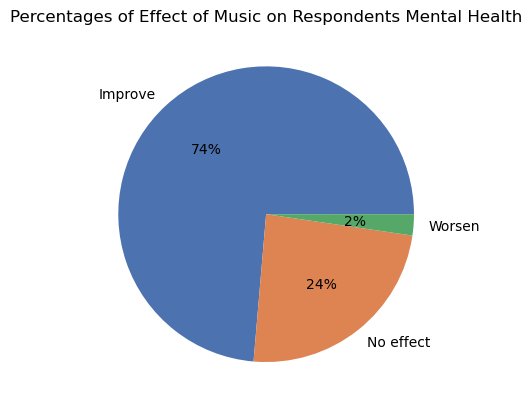

In [598]:
plt.pie(x = df['Music effects'].value_counts().values,
        labels = df['Music effects'].value_counts().index.values,
        autopct = "%1.f%%")

plt.title("Percentages of Effect of Music on Respondents Mental Health")
plt.show()



## 15. Frequencies of Genres

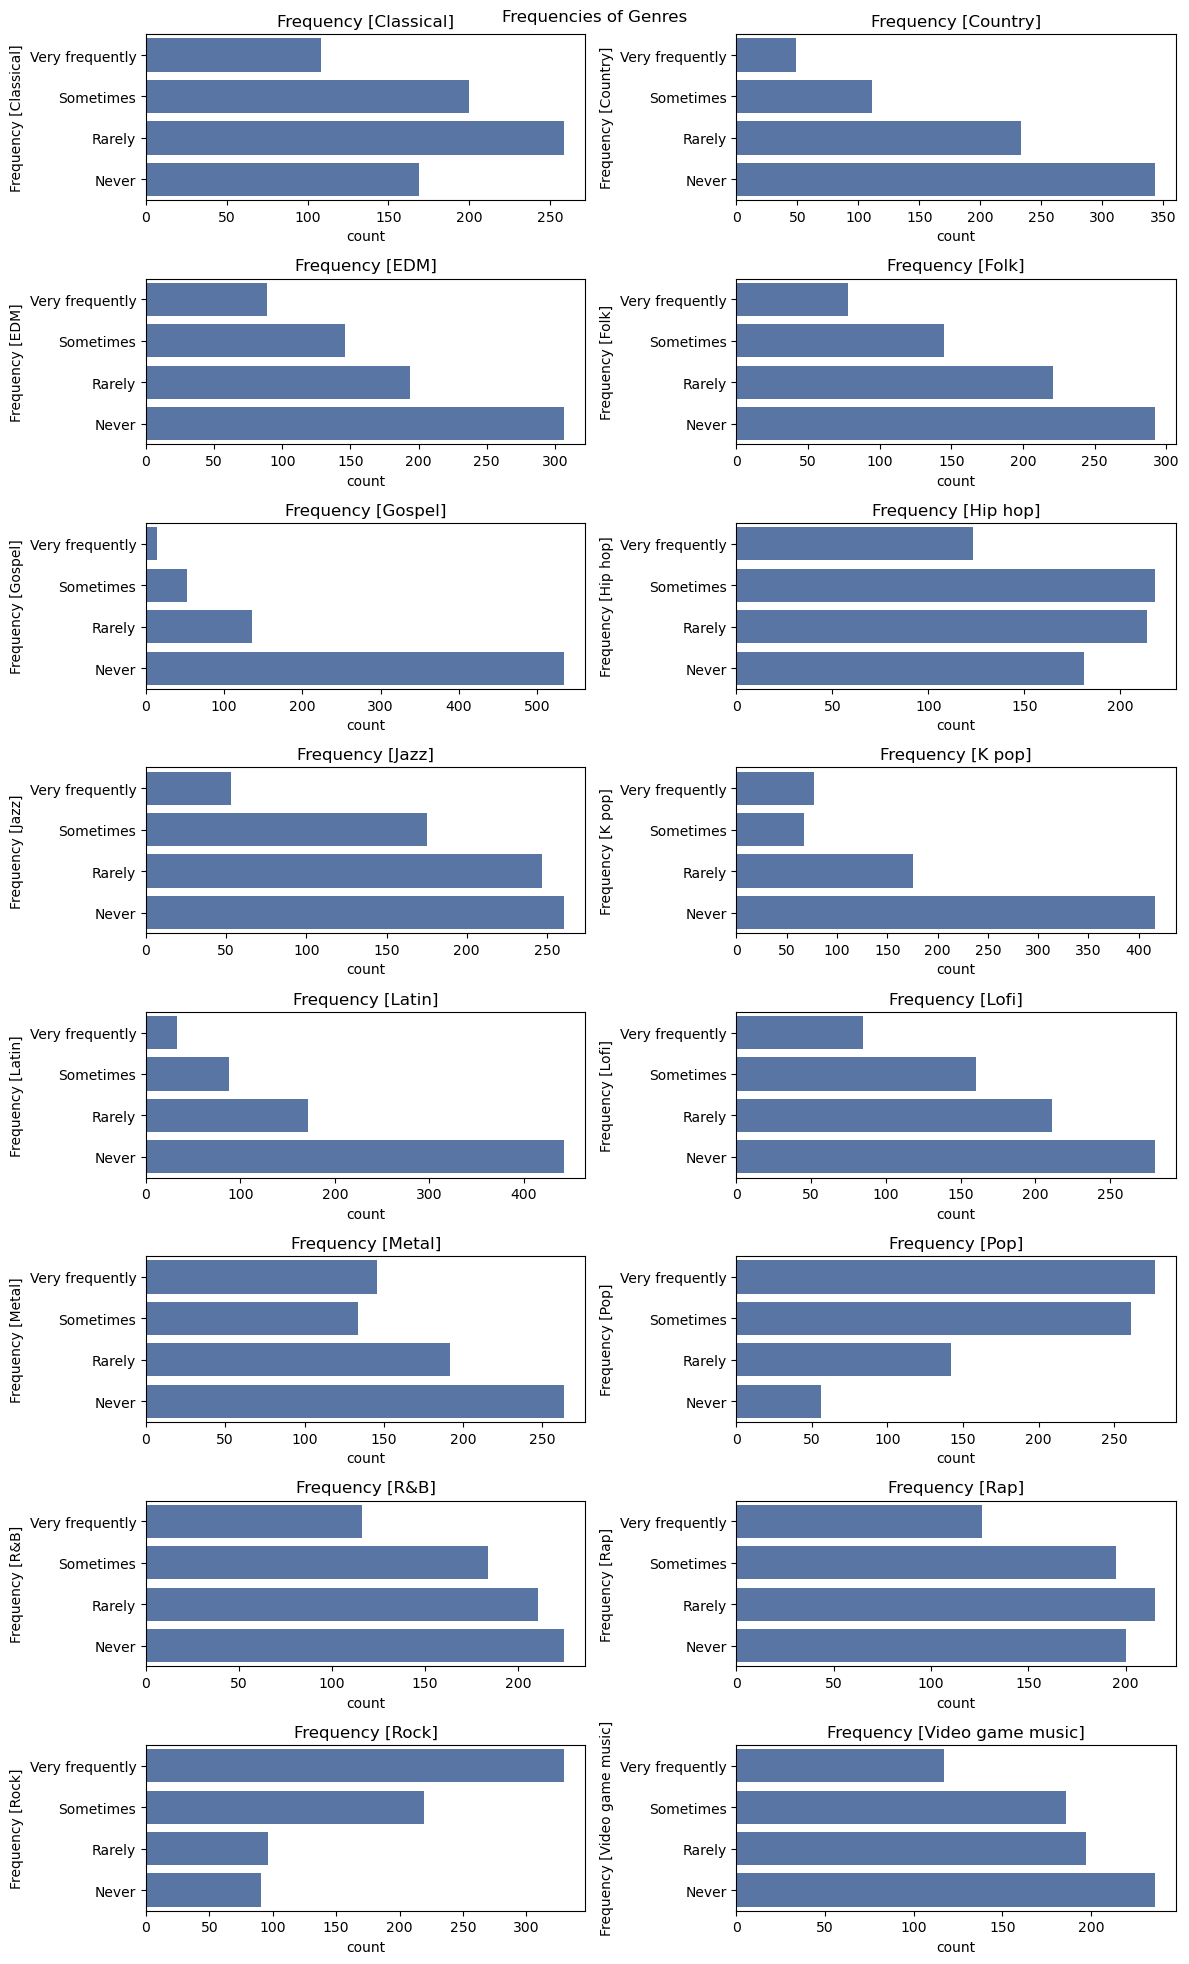

In [600]:
plt.figure(figsize = (12, 20))

for idx, col in enumerate(df.iloc[:, 9:25][:5].columns):
    sorted_col = df[col].sort_values(ascending = False)
    plt.subplot(8, 2, idx+1)
    sns.countplot(sorted_col)
    plt.title(col)

plt.suptitle("Frequencies of Genres")
plt.tight_layout()

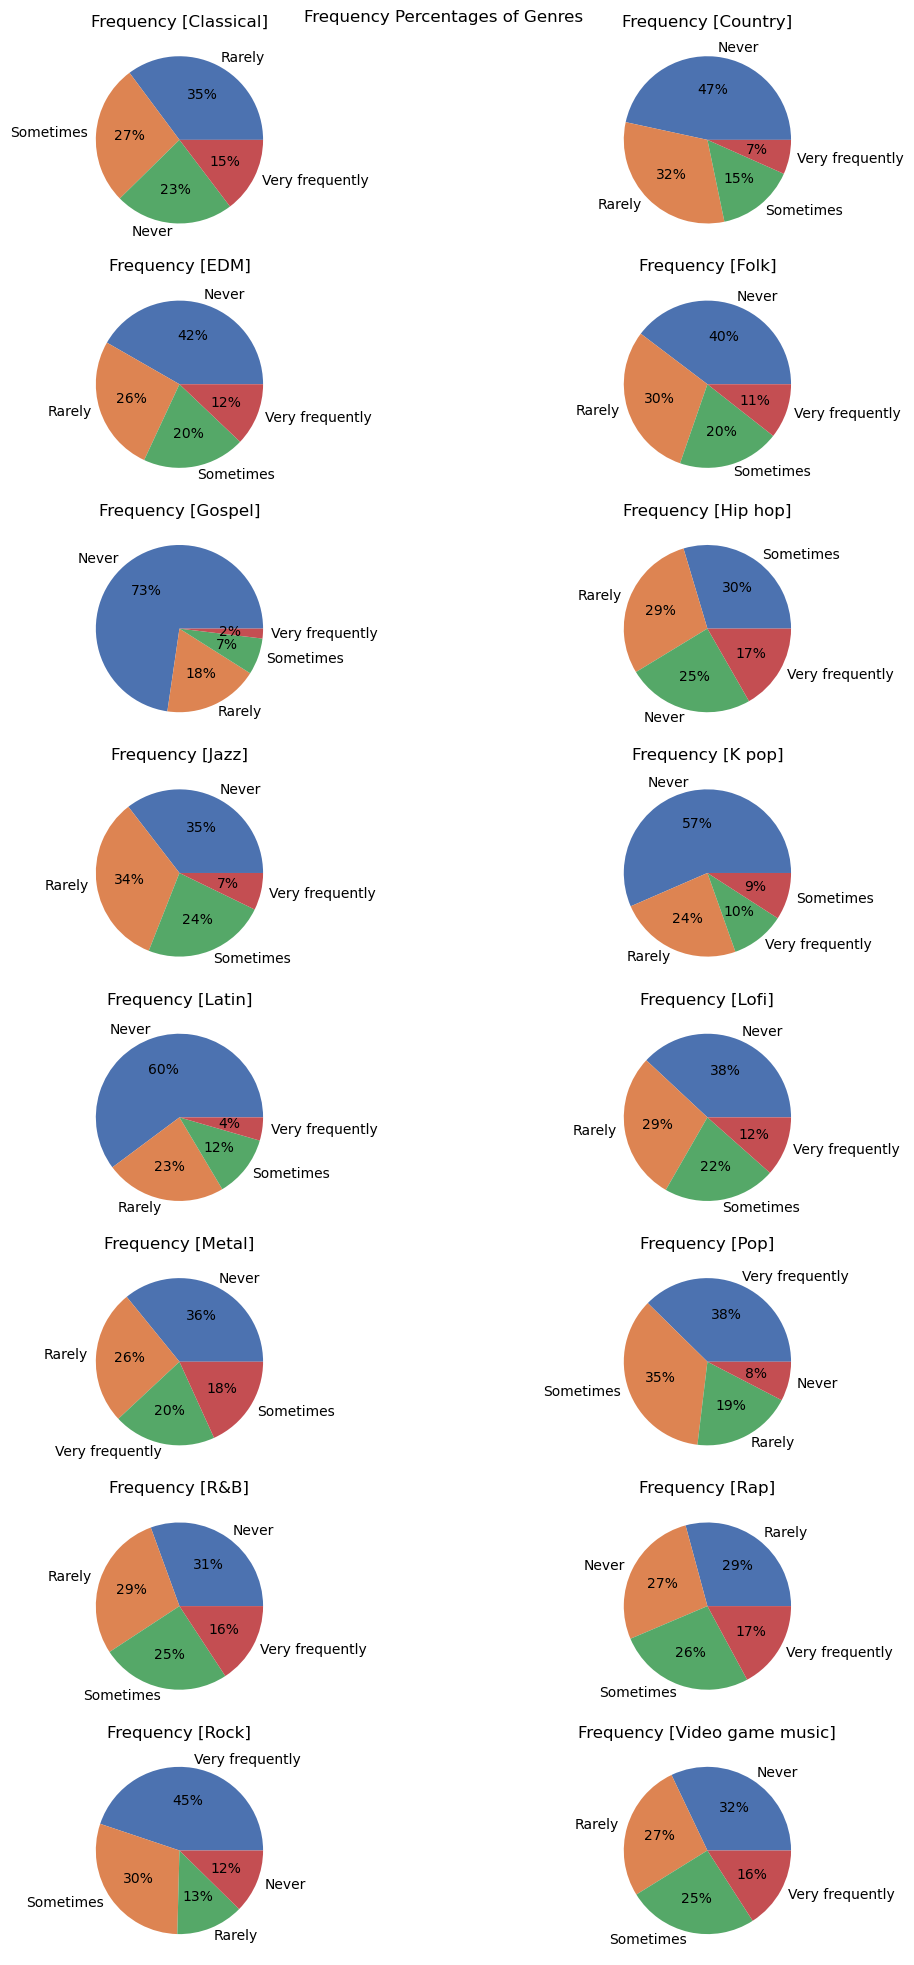

In [601]:
plt.figure(figsize = (12, 20))

for idx, col in enumerate(df.iloc[:, 9:25][:5].columns):
    sorted_col = df[col].sort_values(ascending = False)
    plt.subplot(8, 2, idx+1)
    plt.pie(x = sorted_col.value_counts().values,
            labels = sorted_col.value_counts().index.values,
            autopct = "%1.f%%")
    plt.title(col)

plt.suptitle("Frequency Percentages of Genres")
plt.tight_layout()

According to frequency analyses:

- The most frequently listened three music genres are `Rock [45%]`, `Pop [38%]` and `Metal [20%]`.
- The least frequently listened (never) music genres are `Gospel [73%]`, `Latin [60%]`, `K pop [57%]`.

## 16. Anxiety, Depression, Insomnia, OCD

In [604]:
len(df[df.Anxiety >= 5.0])

503

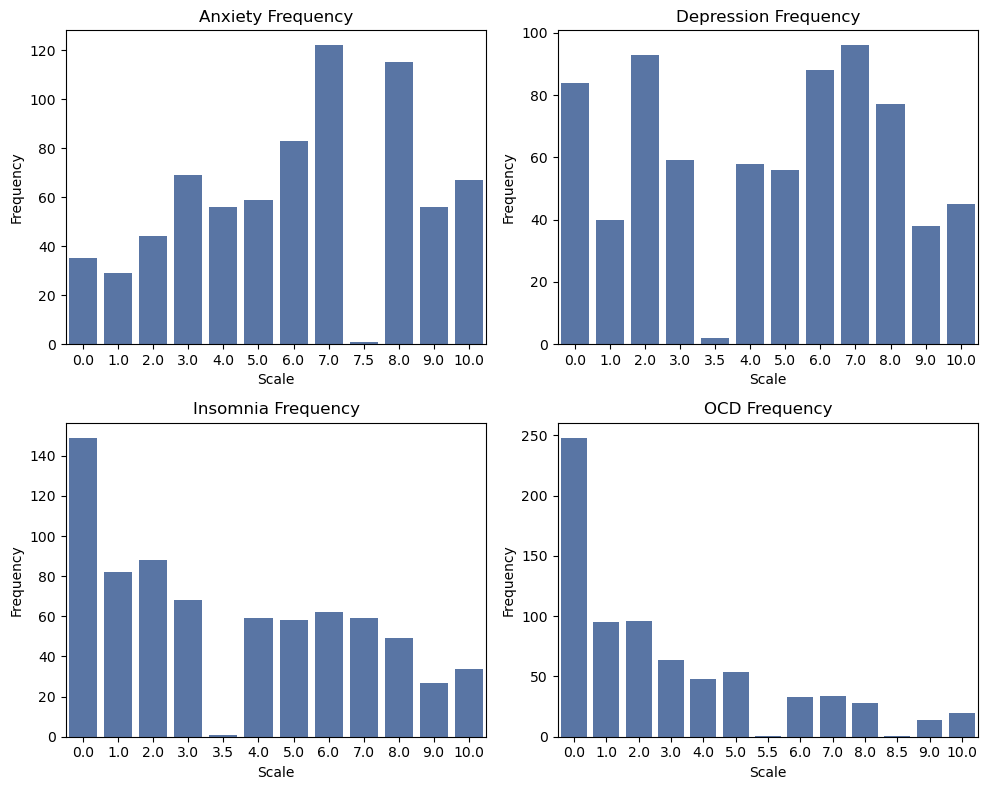

In [605]:
plt.figure(figsize = (10, 8))

for idx, col in enumerate(df.iloc[:, 25:29]):
    plt.subplot(2, 2, idx+1)
    sns.barplot(x = df[col].value_counts().index.values,
                y = df[col].value_counts().values)
    plt.title(f"{col} Frequency")
    plt.xlabel("Scale")
    plt.ylabel("Frequency")

plt.tight_layout()

According to bar plots, we can say that:

- Most common mental health issue is `Anxiety`, following with `Depression`.
- Least common mental health issue is `OCD [Obsessive–compulsive disorder]`.

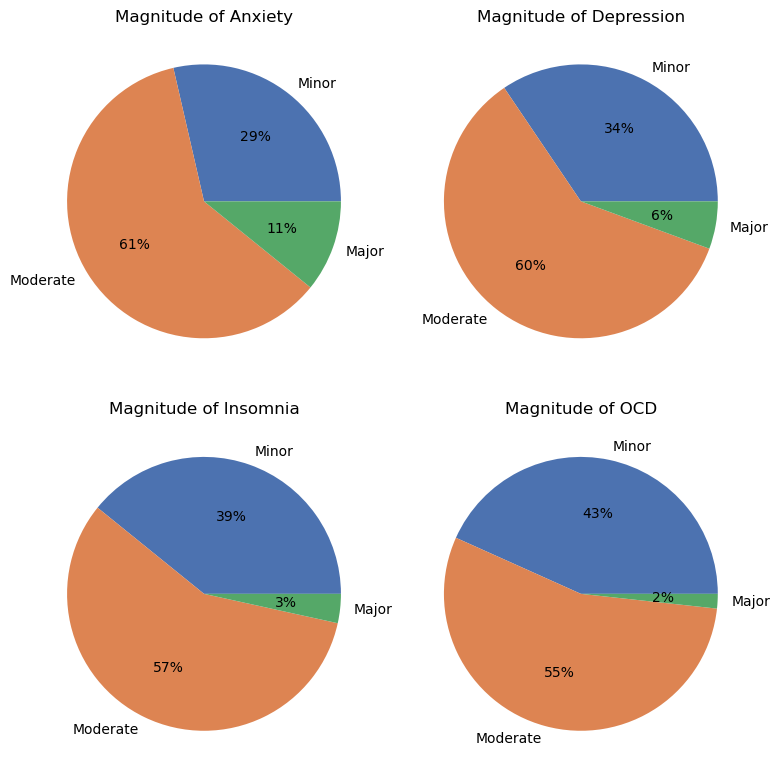

In [607]:
plt.figure(figsize = (8, 8))

for idx, col in enumerate(df.iloc[:, 25:29]):
    plt.subplot(2, 2, idx+1)

    scales = [len(df[df[col] <= 3.0]), len(df[df[col] < 7.0]), len(df[df[col] >= 10.0])]
    labels = ["Minor", "Moderate", "Major"]

    plt.pie(x = scales,
            labels = labels,
            autopct = "%1.f%%")

    plt.title(f"Magnitude of {col}")

plt.tight_layout()

We've also analyzed the magnitude of mental disorders among respondents and we can say:

- Major level `Anxiety` is more common than other disorders with 11% following with `Depression`, as we revealed before.

In [609]:
df.Anxiety.mean()

5.837635869565218

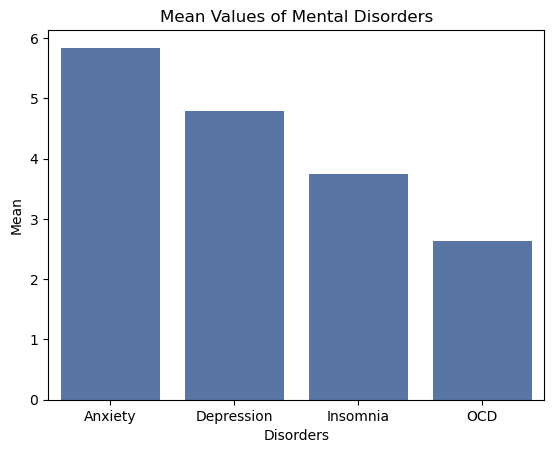

In [610]:
means = []
columns = list(df.iloc[:, 25:29].columns)

for col in df.iloc[:, 25:29]:
    means.append(df[col].mean())

sns.barplot(x = columns,
            y = means)

plt.title("Mean Values of Mental Disorders")
plt.xlabel("Disorders")
plt.ylabel("Mean")
plt.show()

## 17. Inter-columns Analysis 

#### What is the mean age value per streaming service?

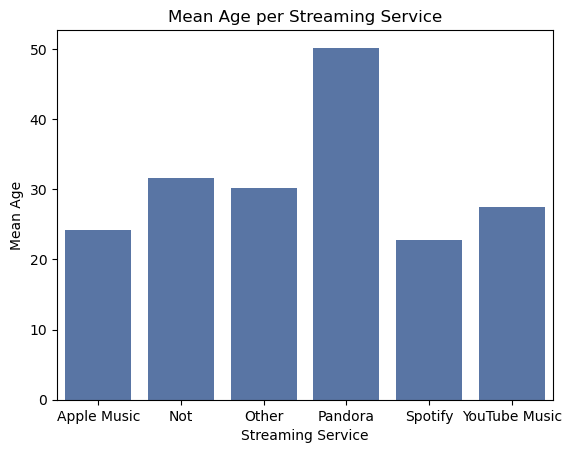

In [613]:
df.groupby('Primary streaming service')['Age'].mean().index.values
df.groupby('Primary streaming service')['Age'].mean().values

sns.barplot(x = df.groupby('Primary streaming service')['Age'].mean().index.values,
            y = df.groupby('Primary streaming service')['Age'].mean().values)

plt.title("Mean Age per Streaming Service")
plt.xlabel("Streaming Service")
plt.ylabel("Mean Age")
plt.show()

We can see that, least mean age value belongs to Spotify with little excessive of 20.

While young people prefers Spotify mostly, Pandora is the choice for older respondents.

#### How many respondents listen music while working per streaming service?

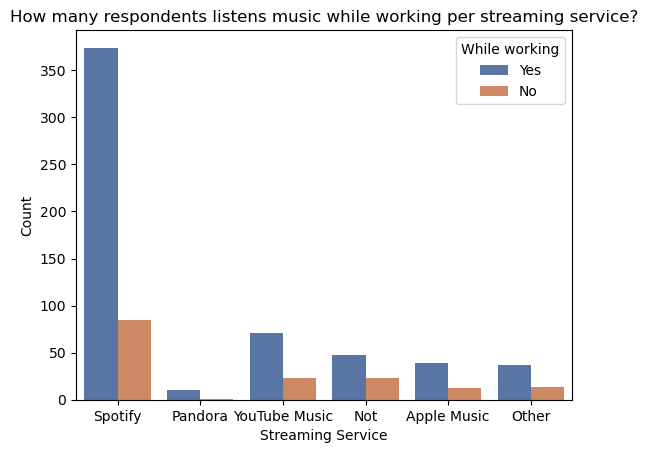

In [616]:
sns.countplot(data = df,
              x = 'Primary streaming service',
             hue = "While working")

plt.title("How many respondents listens music while working per streaming service?")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.show()

Most of the respondents who like to listen music while working also prefers **Spotify**, with **Youtube Music** following.

We've revealed that Pandora music prefered mostly by older people, so we can also say that older people less tend to listening music while working.

#### Which streaming service is preferred most by instrumentalists?

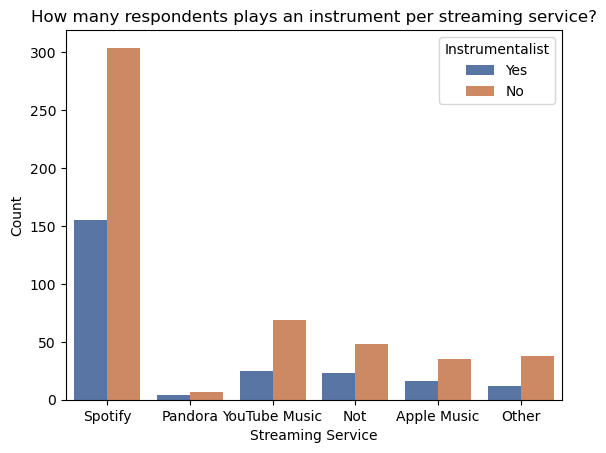

In [619]:
sns.countplot(data = df,
              x = 'Primary streaming service',
             hue = 'Instrumentalist')

plt.title("How many respondents plays an instrument per streaming service?")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.show()

We already knew that many of the respondents do not play any instruments. Among the people who play instruments, most prefered streaming service is again **Spotify**.

#### Which streaming service is mostly preferred by composers?

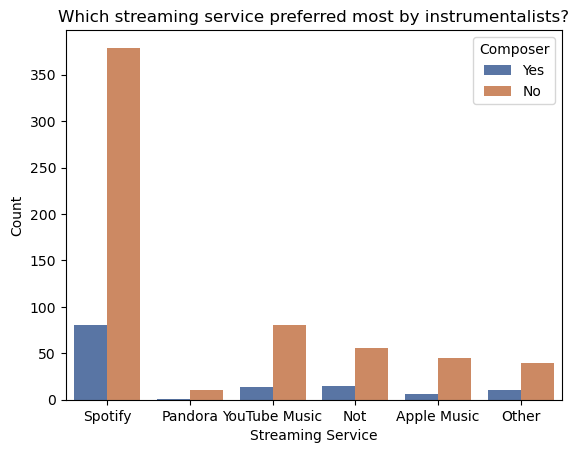

In [622]:
sns.countplot(data = df,
              x = 'Primary streaming service',
             hue = 'Composer')

plt.title("Which streaming service preferred most by instrumentalists?")
plt.xlabel("Streaming Service")
plt.ylabel("Count")
plt.show()

#### How many respondents are both composers and instrumentalists?

In [624]:
df.groupby('Instrumentalist')[['Composer']].value_counts().to_frame()

count
Instrumentalist Composer       
No              No          467
                Yes          34
Yes             No          143
                Yes          92

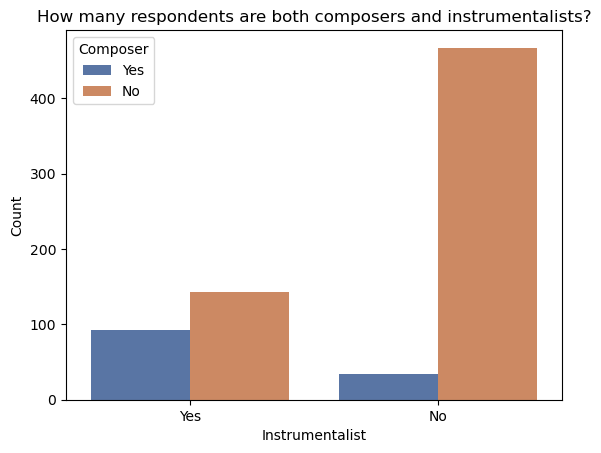

In [625]:
sns.countplot(data = df,
              x = 'Instrumentalist',
             hue = 'Composer')

plt.title("How many respondents are both composers and instrumentalists?")
plt.xlabel("Instrumentalist")
plt.ylabel("Count")
plt.show()

- 92 respondents are both composer and instrumentalist.
- 143 respondents are instrumentalists but not composer.

#### What is the most favorite genre among instrumentalists and composers?

In [628]:
df.head()

,Age,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Month,Age_Category,Hours_Category
0,18,Spotify,Yes,Yes,Yes,Latin,Yes,Yes,156.00,Rarely,...,Never,Sometimes,3.00,0.00,1.00,0.00,No effect,8,Young,Less
1,63,Pandora,Yes,No,No,Rock,Yes,No,119.00,Sometimes,...,Very frequently,Rarely,7.00,2.00,2.00,1.00,No effect,8,Old,Less
2,18,Spotify,No,No,No,Video game music,No,Yes,132.00,Never,...,Rarely,Very frequently,7.00,7.00,10.00,2.00,No effect,8,Young,Less
3,61,YouTube Music,Yes,No,Yes,Jazz,Yes,Yes,84.00,Sometimes,...,Never,Never,9.00,7.00,3.00,3.00,Improve,8,Old,Less
4,18,Spotify,Yes,No,No,R&B,Yes,No,107.00,Never,...,Never,Rarely,7.00,2.00,5.00,9.00,Improve,8,Young,Less


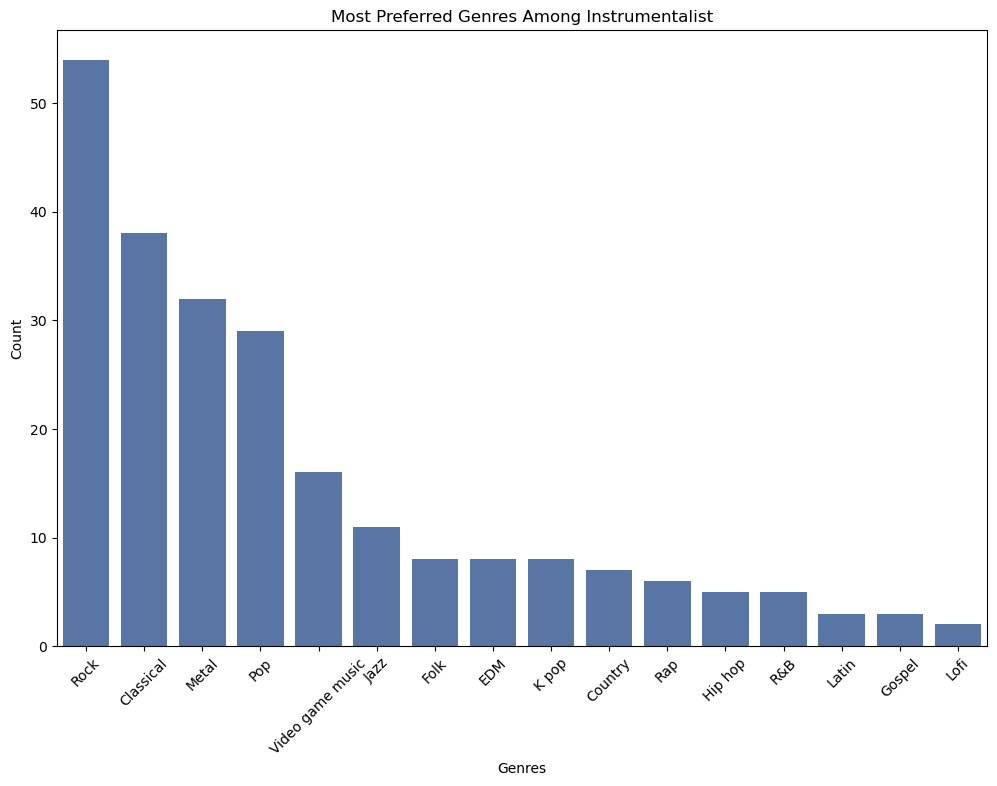

In [629]:
plt.figure(figsize = (12, 8))

sns.barplot(x = df[df['Instrumentalist'] == "Yes"]['Fav genre'].value_counts().index.values,
            y = df[df['Instrumentalist'] == "Yes"]['Fav genre'].value_counts().values)

plt.title("Most Preferred Genres Among Instrumentalist")
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

Most preferred genres among instrumentalists are **Rock**, **Classical** and **Metal**.

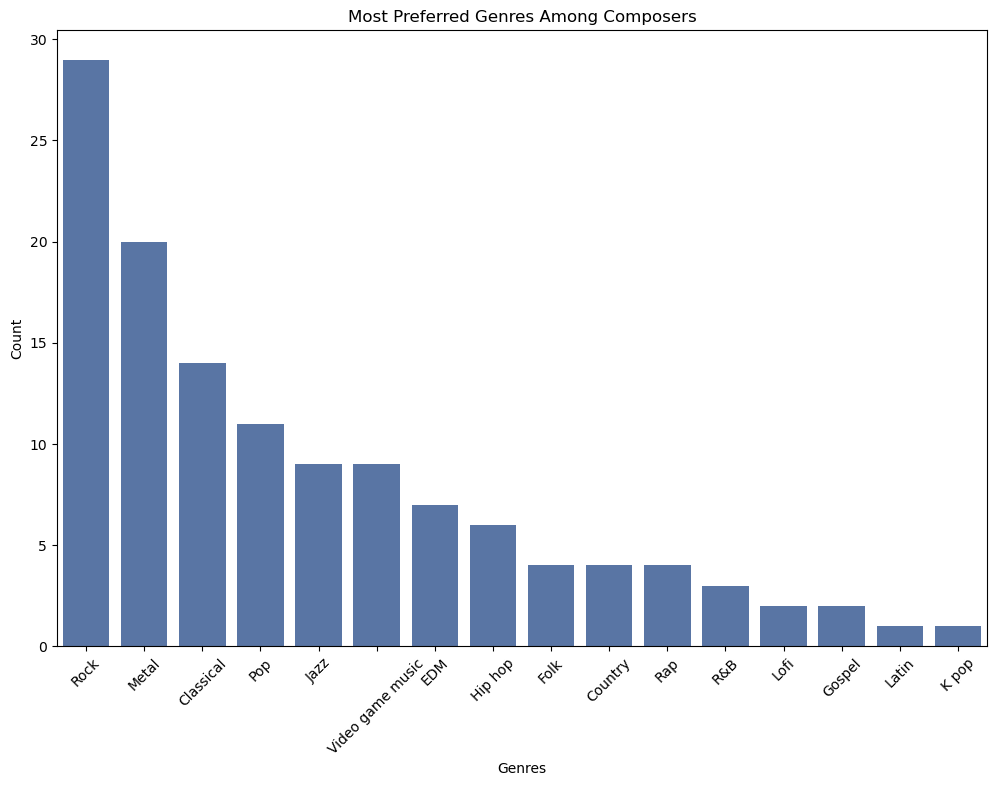

In [631]:
plt.figure(figsize = (12, 8))

sns.barplot(x = df[df['Composer'] == "Yes"]['Fav genre'].value_counts().index.values,
            y = df[df['Composer'] == "Yes"]['Fav genre'].value_counts().values)

plt.title("Most Preferred Genres Among Composers")
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

Most preferred genres among composers are **Rock**, **Metal** and **Classical**.

#### What is the mean age value per favorite genre?

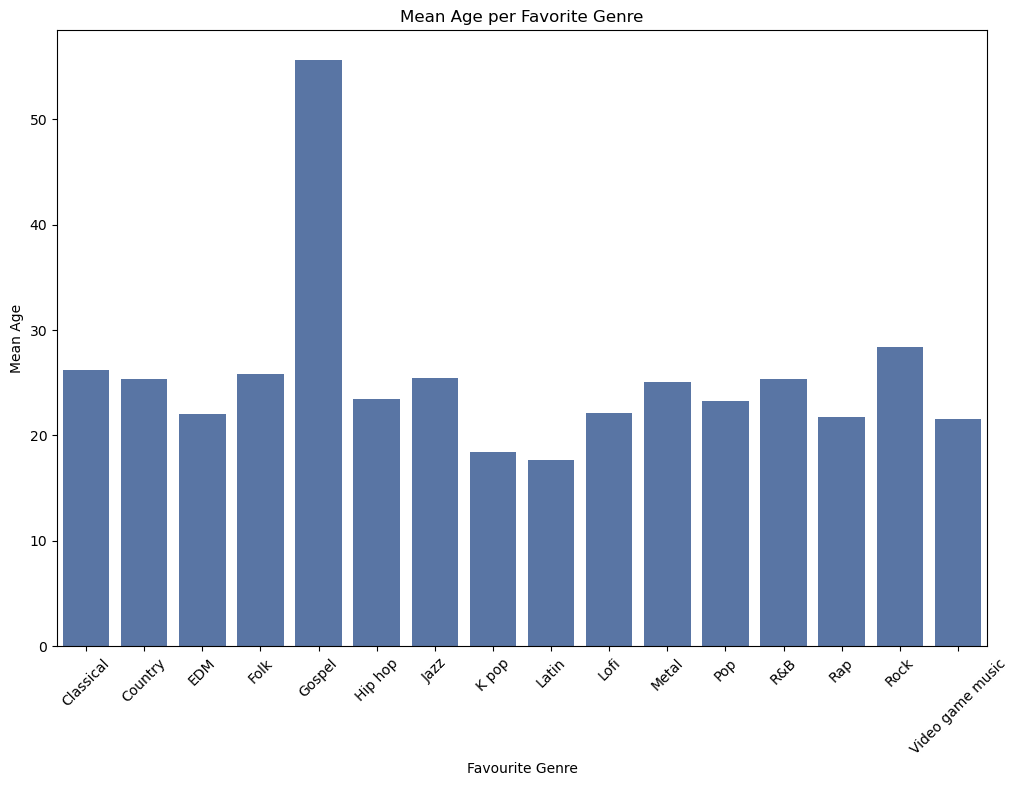

In [634]:
plt.figure(figsize = (12, 8))

sns.barplot(x = df.groupby('Fav genre')['Age'].mean().index.values,
            y = df.groupby('Fav genre')['Age'].mean().values)

plt.title("Mean Age per Favorite Genre")
plt.xticks(rotation = 45)
plt.xlabel("Favourite Genre")
plt.ylabel("Mean Age")
plt.show()

It is very surprising that mean age values per favourite genres seems very balanced.

Respondents between ages 20-30 seems like enjoying listening many kinds of musics, but as an outlier, Gospel style is mostly preferred by older people.

How about listening frequencies?

#### What are the mean age values per genre listening frequencies?


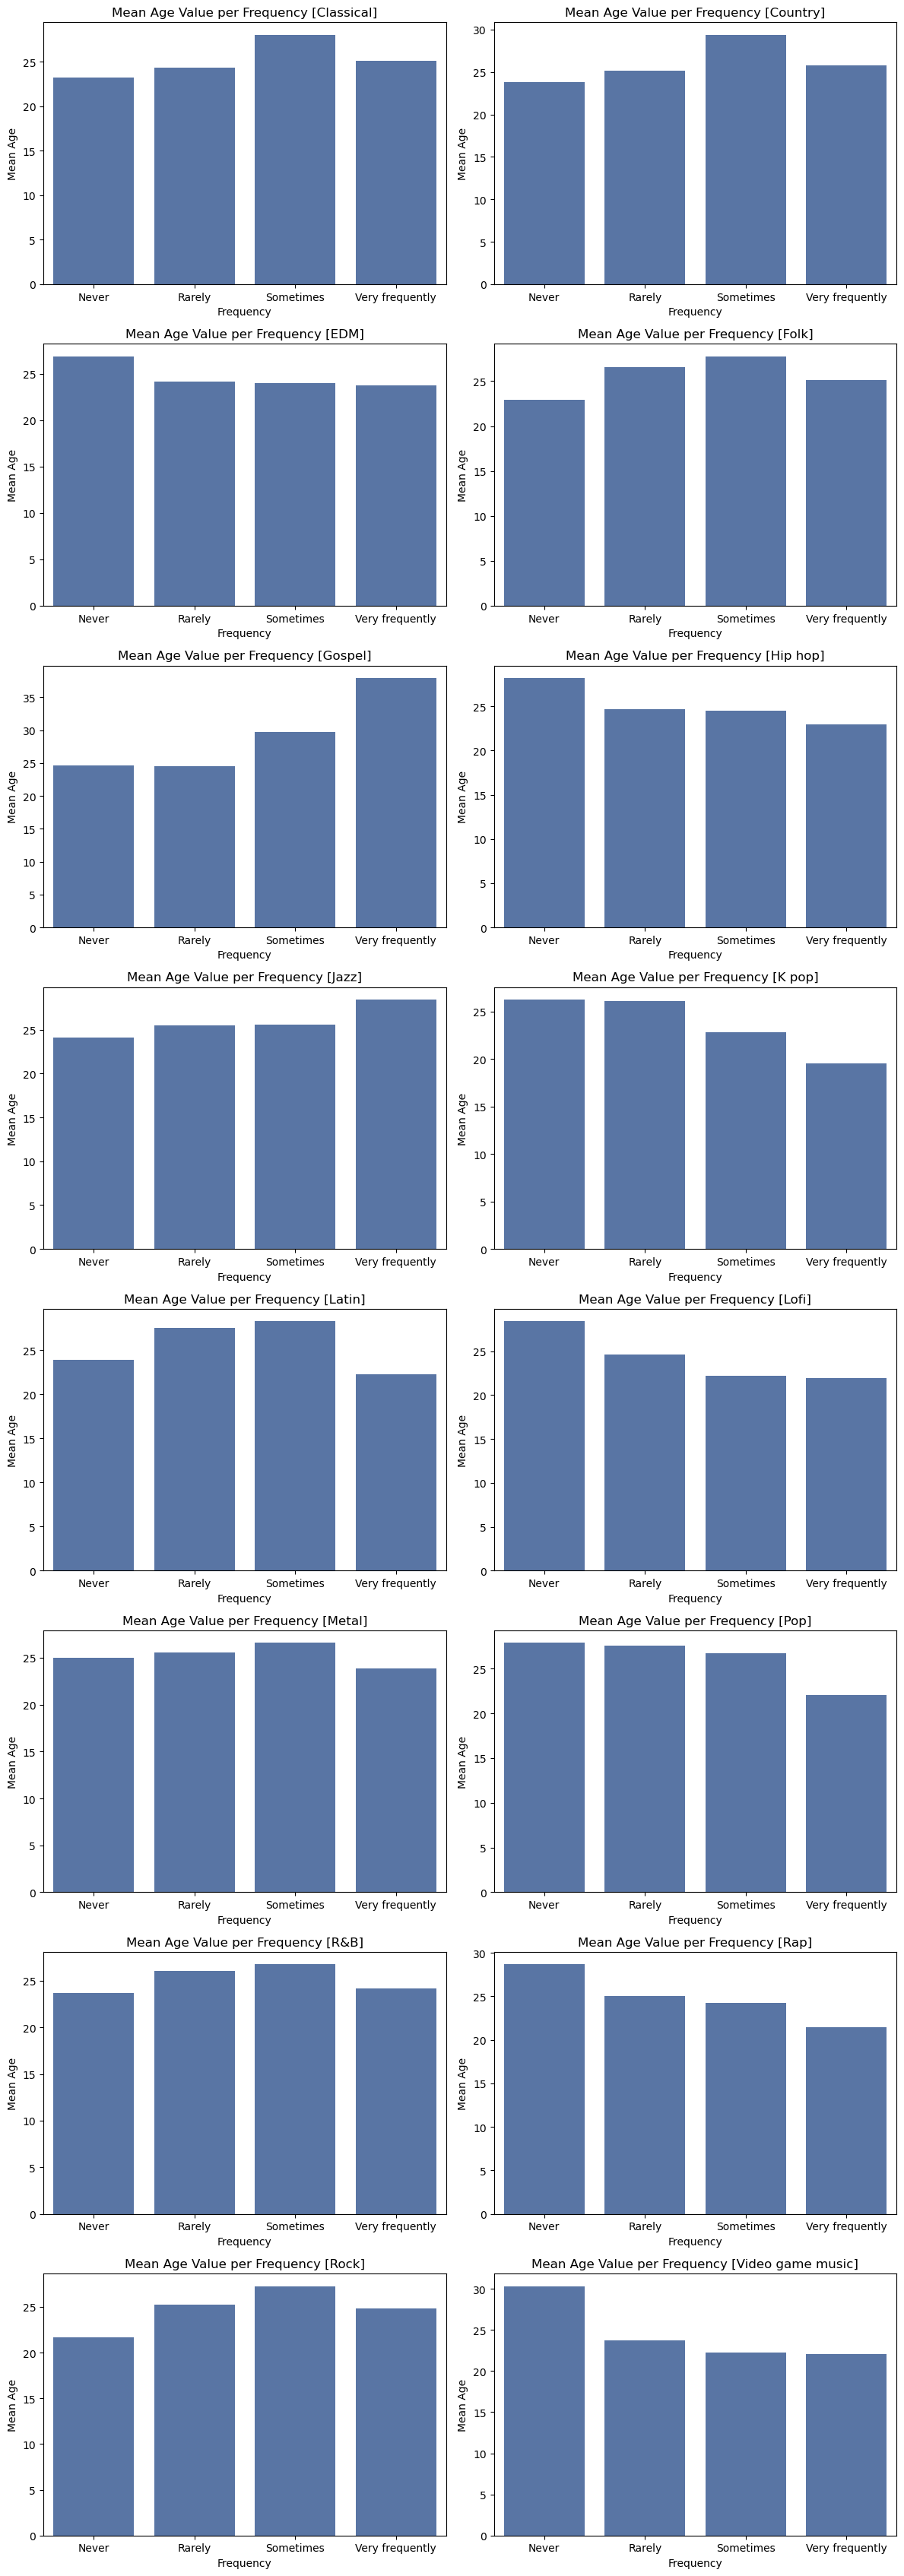

In [637]:
plt.figure(figsize = (12, 34))

for (idx, col) in enumerate(df.iloc[:, 9:25].columns):
    plt.subplot(8, 2, idx+1)
    
    sns.barplot(x = df.groupby(col)['Age'].mean().index.values,
                y = df.groupby(col)['Age'].mean().values)

    plt.title(f"Mean Age Value per {col}")
    plt.xlabel("Frequency")
    plt.ylabel("Mean Age")


plt.tight_layout()


#### What are the mean BPM values per age category?

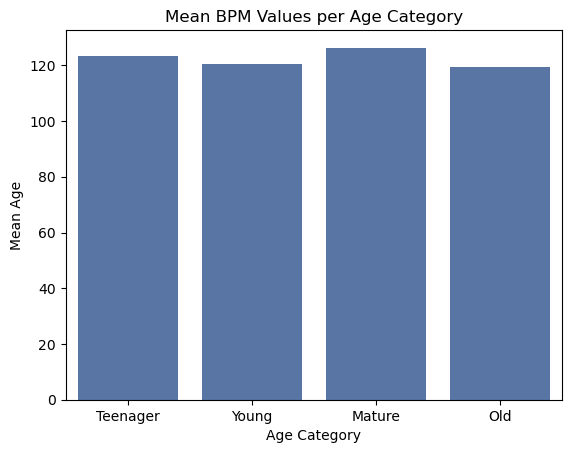

In [639]:
sns.barplot(x = df.groupby('Age_Category', observed = False)['BPM'].mean().index.values,
            y = df.groupby('Age_Category', observed = False)['BPM'].mean().values)

plt.title("Mean BPM Values per Age Category")
plt.xlabel("Age Category")
plt.ylabel("Mean Age")
plt.show()

I was expected that older people prefer lower beats per minute, but it seems like there is not much difference between age categories.

#### Mean Age Values According to Music Listening Hours

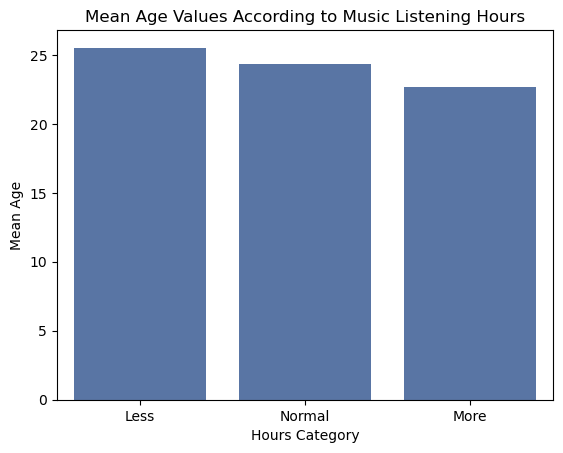

In [642]:
sns.barplot(x = df.groupby('Hours_Category', observed = False)['Age'].mean().index.values,
            y = df.groupby('Hours_Category', observed = False)['Age'].mean().values)

plt.title("Mean Age Values According to Music Listening Hours")
plt.xlabel("Hours Category")
plt.ylabel("Mean Age")
plt.show()

As we can see that, even if there is not much difference between categories, young people tend to listen music for more hours.

#### Are mental health issues correlated with each other?

Let's create a new feature `Total_Health_Point`. This feature will include total health scores of respondents according to Anxiety, Depression, Insomnia and OCD scores. Lower is better.

In [646]:
df['Total_Health_Point'] = df['Anxiety'] + df['Depression'] + df['Insomnia'] + df['OCD']

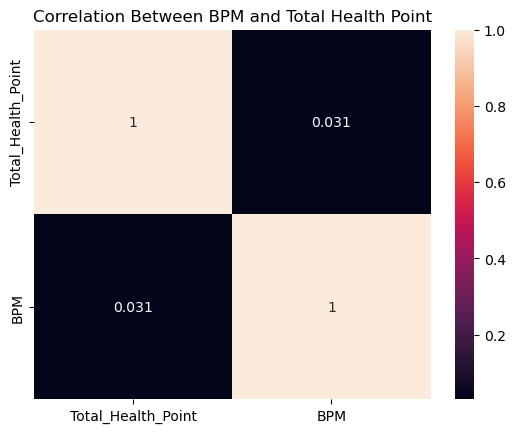

In [647]:
sns.heatmap(df[['Total_Health_Point', 'BPM']].corr(), annot = True)

plt.title("Correlation Between BPM and Total Health Point")
plt.show()

It looks like there is no sufficient correlation between total health point and BPM. Let's examine this with the mental health issue categories seperately.

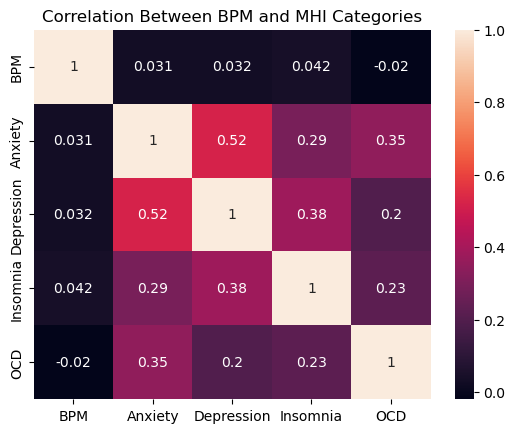

In [649]:
sns.heatmap(df[['BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr(), annot = True)

plt.title("Correlation Between BPM and MHI Categories")
plt.show()

- BPM is not correlated with issue categories.
- It seems that there is a sufficient positive correlation between Depression and Anxiety. We can say that if someone says s/he has anxiety or depression, we can consider that s/he suffer from the other issue also.
- It looks like that insomnia and depression are also correlated but it is lower than depression/anxiety.

#### What are the mean Total Health Point values per genre frequency?

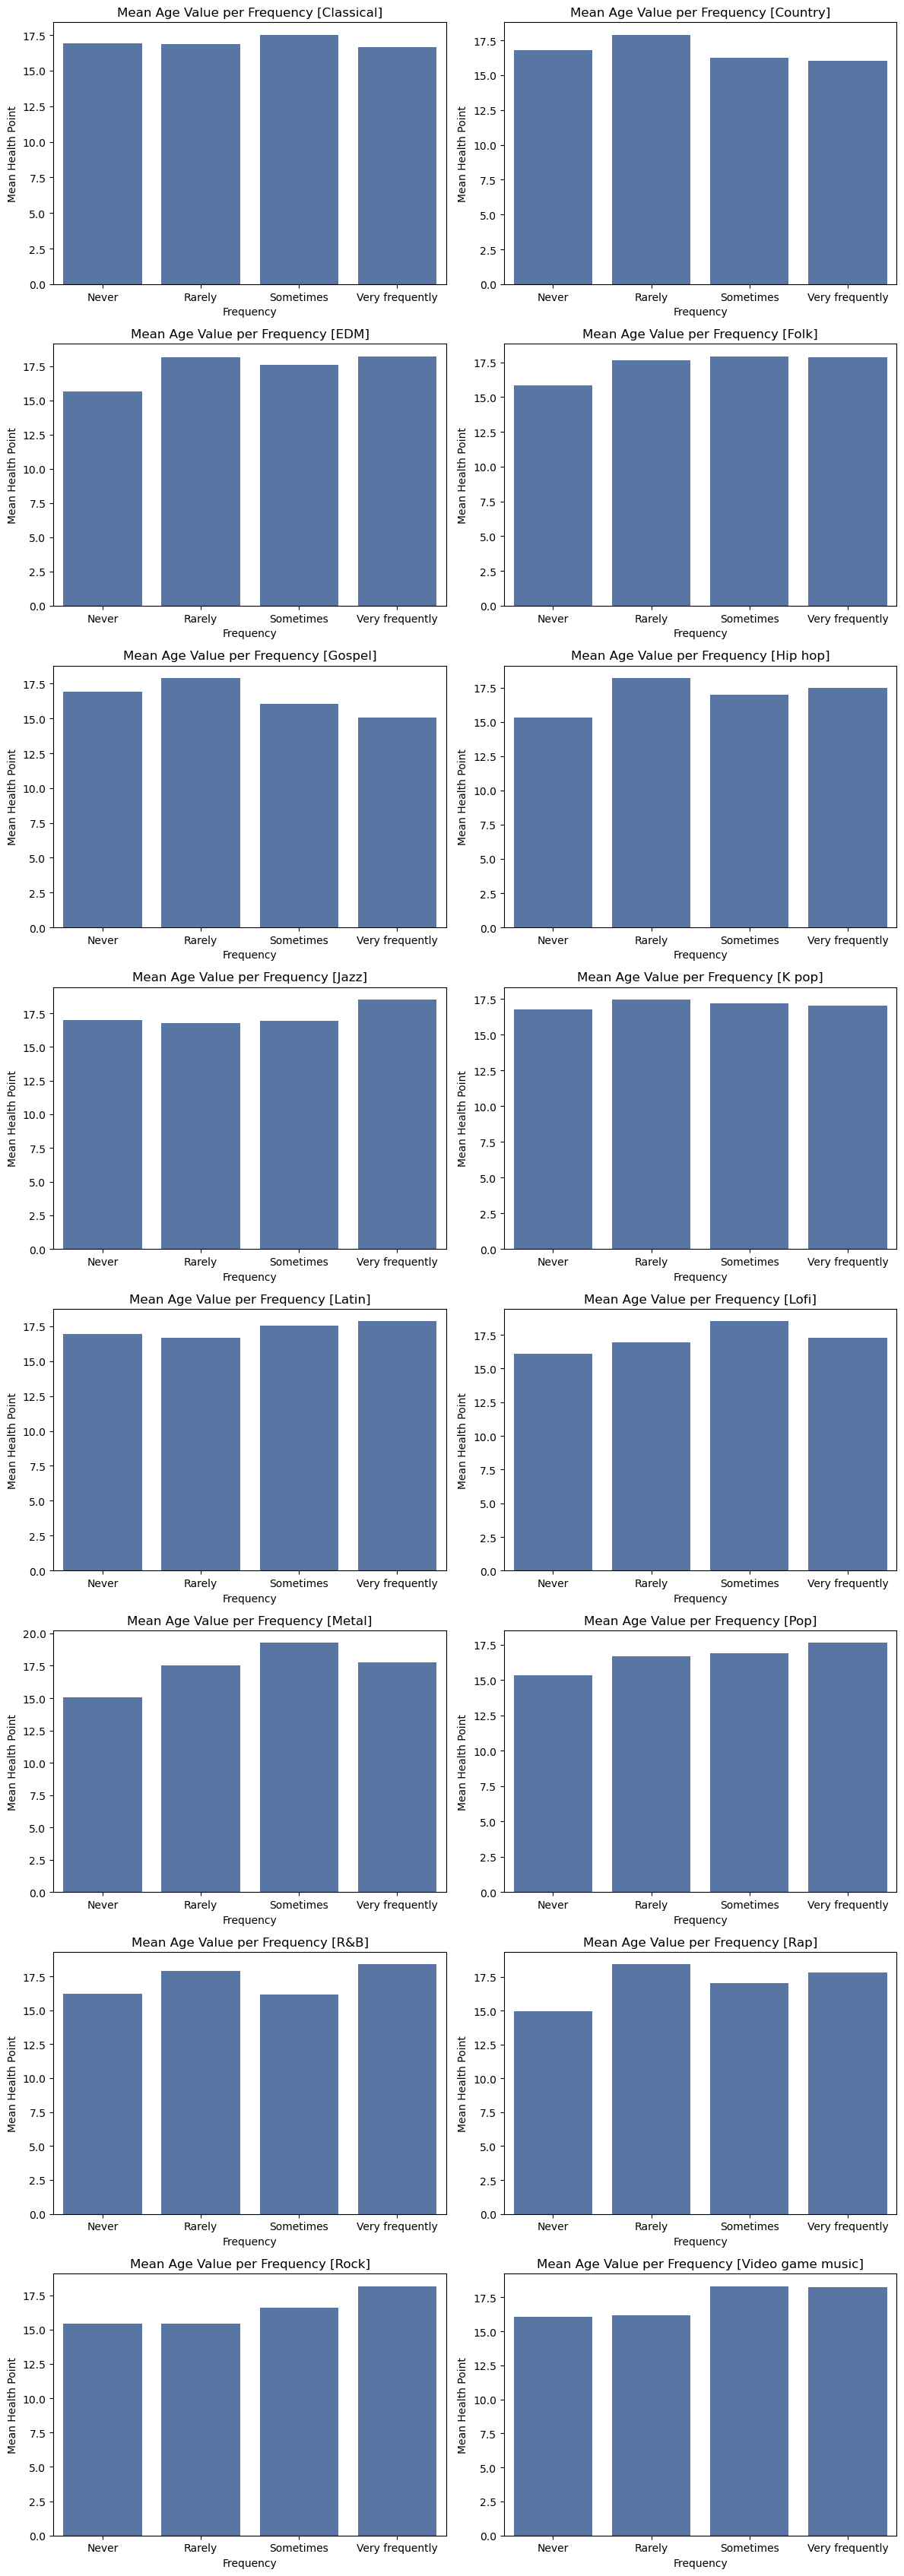

In [652]:
plt.figure(figsize = (12, 34))

for (idx, col) in enumerate(df.iloc[:, 9:25].columns):
    plt.subplot(8, 2, idx+1)
    
    sns.barplot(x = df.groupby(col)['Total_Health_Point'].mean().index.values,
                y = df.groupby(col)['Total_Health_Point'].mean().values)

    plt.title(f"Mean Age Value per {col}")
    plt.xlabel("Frequency")
    plt.ylabel("Mean Health Point")


plt.tight_layout()

There is not much differences for mean health values per listening frequency of genres, but we can say if someone never listens **Metal** and **Rap**, the possibility to having higher issue points will be lower.

Also, it looks like that listening **Gospel** frequently can help about mental disorders.

#### How is self-consideration about the effects of music related to health points?

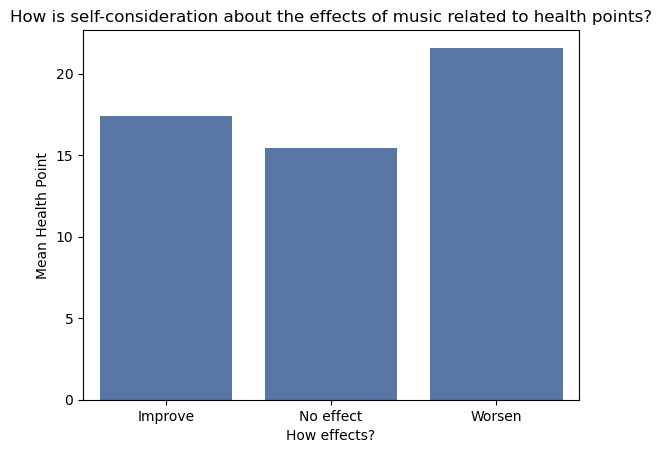

In [655]:
df.groupby("Music effects")['Total_Health_Point'].mean().index.values
df.groupby("Music effects")['Total_Health_Point'].mean().values

sns.barplot(x = df.groupby("Music effects")['Total_Health_Point'].mean().index.values,
            y = df.groupby("Music effects")['Total_Health_Point'].mean().values)

plt.title("How is self-consideration about the effects of music related to health points?")
plt.xlabel("How effects?")
plt.ylabel("Mean Health Point")
plt.show()

- Respondents who claim that listening music worsen their mental healths seems like having an accurate self-consideration, since the mean health point for them looks higher than others.
- Respondentns who claim that listening music does not effect their mental health is under-estimating the positive effect of the listening music, since it **does** effecting their mental health in good way.

#### Does playing an instrument and being a composer effect mental health?

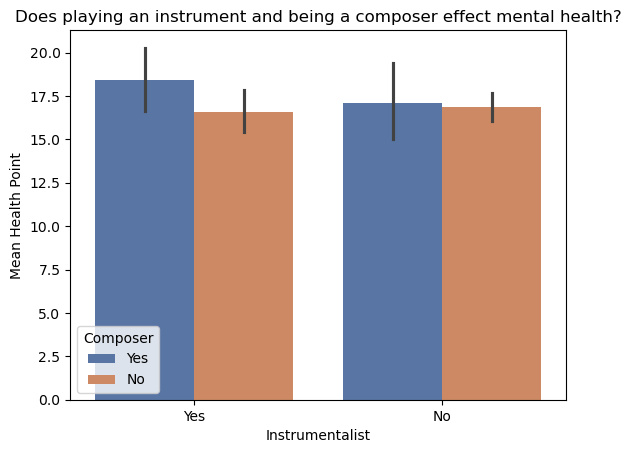

In [658]:
sns.barplot(data = df,
            x = "Instrumentalist",
            y = "Total_Health_Point",
            hue = "Composer")

plt.title("Does playing an instrument and being a composer effect mental health?")
plt.xlabel("Instrumentalist")
plt.ylabel("Mean Health Point")
plt.show()

It looks like there is not much difference on the average between playing an instrument or not, but respondents who both instrumentalist and composer seems like having lesser mental health issues than other respondents.